In [1]:
import colorcet as cc
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches
from matplotlib.collections import PatchCollection

In [2]:
import sys
sys.path.append('../src')
import dynamics as dn
import hypercube as hc
import networks as ns

In [3]:
label_fontsize = 10

# Fig. 1

In [4]:
def draw_3d_cube(hamiltonian_path=False, fig=None, ax=None):
    num_dimensions = 3
    num_vertices = 2**num_dimensions
    decimals = np.arange(num_vertices)
    edges = hc._hypercube_edge_pairs(num_dimensions)
    binaries = hc._int2bin(decimals, num_dimensions)
    labels = hc._bin2labels(binaries)
    basis = np.array(
        [
            [1, 0],
            [0.4, 0.2],
            [0, 1],
        ]
    )
    coordinates = binaries @ basis
    coordinates -= coordinates.mean()

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize1)
    lw = 0.5
    if hamiltonian_path:
        lw = 0.2
    # edges
    for pair in edges:
        start_ind = pair[0]
        end_ind = pair[1]
        start = coordinates[start_ind].copy()
        end = coordinates[end_ind].copy()
        ax.plot(
            [start[0], end[0]],
            [start[1], end[1]],
            c="k",
            solid_capstyle="round",
            lw=lw,
        )
    # labels
    for i in range(num_vertices):
        coordinate = coordinates[i]
        label = labels[i]
        y_shift = 2*(i%2) - 1
        y_shift *= 0.07
        x_shift = -y_shift
        ax.text(
            coordinate[0]+x_shift,
            coordinate[1]+y_shift,
            label,
            ha="center",
            va="center",
            color="k",
            fontsize=6,
        )
    if hamiltonian_path:
        grays = hc._bin2gray(binaries)
        hamiltonian_path = hc._bin2int(grays)
        hamiltonian_path_edges = np.transpose((hamiltonian_path[:-1], hamiltonian_path[1:]))
        for pair in hamiltonian_path_edges:
            start_ind = pair[0]
            end_ind = pair[1]
            start = coordinates[start_ind].copy()
            end = coordinates[end_ind].copy()
            ax.arrow(
                start[0],
                start[1],
                end[0] - start[0],
                end[1] - start[1],
                fc="gray",
                width=0.02,
                length_includes_head=True,
                zorder=2,
                lw=0,
            )
    ax.set_aspect("equal")
    ax.axis("off")
    return fig, ax

In [5]:
def draw_4d_cube(hamiltonian_path=False, fig=None, ax=None):
    num_dimensions = 4
    num_vertices = 2**num_dimensions
    decimals = np.arange(num_vertices)
    edges = hc._hypercube_edge_pairs(num_dimensions)
    binaries = hc._int2bin(decimals, num_dimensions)
    labels = hc._bin2labels(binaries)
    basis = np.array(
        [
            [1, 0],
            [0.4, 0.2],
            [0, 1],
        ]
    )
    coordinates = binaries[:, 1:] @ basis
    coordinates -= coordinates.mean()

    label_margin = 0.05
    scale = 0.54
    coordinates[2 ** (num_dimensions - 1) :] *= scale
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize1)
    lw = 0.5
    if hamiltonian_path:
        lw = 0.2
    # edges
    small_dimensions = num_dimensions - 1
    # for i in range(2**(small_dimensions-1)*small_dimensions):
    for i in range(len(edges)):
        pair = edges[i]
        start_ind = pair[0]
        end_ind = pair[1]
        start = coordinates[start_ind].copy()
        end = coordinates[end_ind].copy()
        ax.plot(
            [start[0], end[0]],
            [start[1], end[1]],
            c="k",
            solid_capstyle="round",
            lw=lw,
        )
    # labels
    for i in range(num_vertices):
        coordinate = coordinates[i]
        label = labels[i]
        y_shift = 0.07*(2*(i%2) - 1)
        x_shift = -y_shift
        if i//8 == 1:
            if label[1] == "0" and label[2] == "0":
                y_shift = -0.03*(2*(i%2)-1)
                x_shift = -0.14
            elif label[1] == "1" and label[2] == "1":
                y_shift = -0.03*(2*(i%2)-1)
                x_shift = +0.14
            elif label[1] == "0" and label[2] == "1":
                y_shift = -0.06
                x_shift = +0.12
            else :
                y_shift = -0.06
                x_shift = -0.12
        ax.text(
            coordinate[0]+x_shift,
            coordinate[1]+y_shift,
            label,
            ha="center",
            va="center",
            color="k",
            fontsize=6,
        )
    if hamiltonian_path:
        grays = hc._bin2gray(binaries)
        hamiltonian_path = hc._bin2int(grays)
        hamiltonian_path_edges = np.transpose((hamiltonian_path[:-1], hamiltonian_path[1:]))
        for pair in hamiltonian_path_edges:
            start_ind = pair[0]
            end_ind = pair[1]
            start = coordinates[start_ind].copy()
            end = coordinates[end_ind].copy()
            ax.arrow(
                start[0],
                start[1],
                end[0] - start[0],
                end[1] - start[1],
                fc="gray",
                width=0.012,
                length_includes_head=True,
                zorder=2,
                lw=0,
            )
    ax.set_aspect("equal")
    ax.axis("off")
    return fig, ax

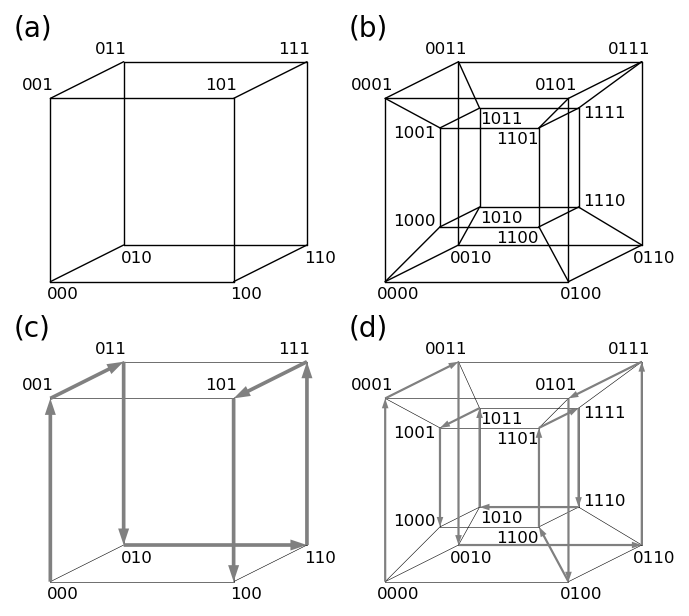

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(3.375, 3.0), sharex=True, sharey=True,)
ax = axs[0, 0]
fig, ax = draw_3d_cube(fig=fig, ax=ax)
ax.text(-0.075, 1.07, "(a)", transform=ax.transAxes, fontsize=label_fontsize)
ax = axs[0, 1]
fig, ax = draw_4d_cube(fig=fig, ax=ax)
ax.text(-0.075, 1.07, "(b)", transform=ax.transAxes, fontsize=label_fontsize)
ax = axs[1, 0]
fig, ax = draw_3d_cube(hamiltonian_path=True, fig=fig, ax=ax)
ax.text(-0.075, 1.07, "(c)", transform=ax.transAxes, fontsize=label_fontsize)
ax = axs[1, 1]
fig, ax = draw_4d_cube(hamiltonian_path=True, fig=fig, ax=ax)
ax.text(-0.075, 1.07, "(d)", transform=ax.transAxes, fontsize=label_fontsize)

fig.savefig("../figures/fig-1.svg")
fig.savefig("../figures/fig-1.pdf")

# Fig. 2

In [7]:
def color_indicator(ax, Ndims, lower_left_x=0.6, lower_left_y=-0.2, fontsize=6):
    axins = ax.inset_axes([lower_left_x, lower_left_y, 0.05*Ndims, 0.5], transform=ax.transAxes)
    ax = axins
    ax.pcolormesh([np.arange(Ndims)], cmap=plt.cm.tab10, vmin=0, vmax=9)
    for i in range(Ndims):
        ax.text(
            i + 0.5, 0.5, i + 1, c="w", ha="center", va="center", weight="bold", fontsize=fontsize,  # "$b_" + f"{i+1}$",
        )
    ax.set_aspect("equal")
    ax.axis("off")

/home/yoshi/hypercube_paper_part1_figures/notebooks/../src/hypercube.py:257: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cbar = ax.scatter(


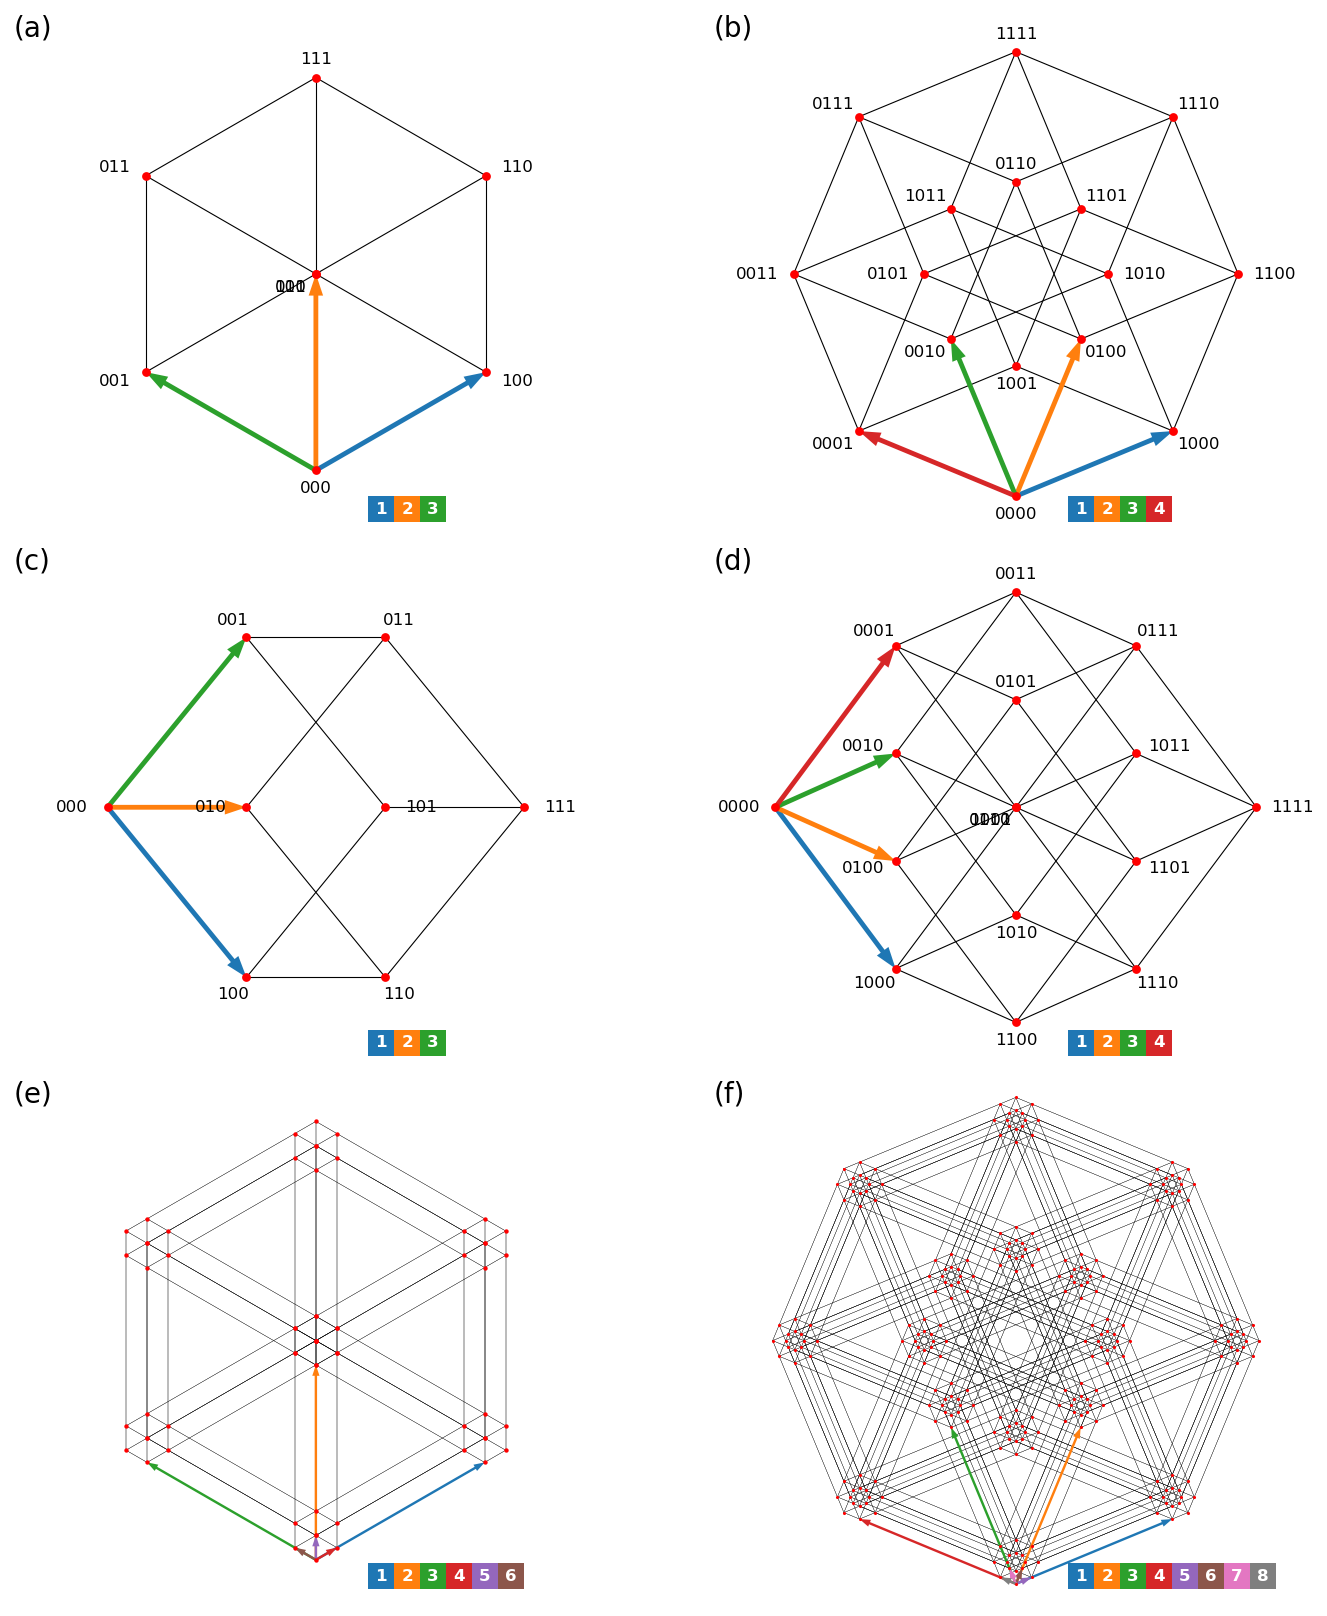

In [8]:
label_pos = [-0.08, 1]
fig, axs = plt.subplots(3, 2, figsize=(7, 8), sharex=True, sharey=True)

style = "isometric"
Ndims = 3
ax = axs[0, 0]
fig, ax = hc.project_hypercube(Ndims, style, plot_basis=True, fig=fig, ax=ax)
ax.text(*label_pos, "(a)", transform=ax.transAxes, fontsize=label_fontsize, ha="left", va="top")
color_indicator(ax, Ndims)
Ndims = 4
ax = axs[0, 1]
fig, ax = hc.project_hypercube(Ndims, style, plot_basis=True, fig=fig, ax=ax)
ax.text(*label_pos, "(b)", transform=ax.transAxes, fontsize=label_fontsize, ha="left", va="top")
color_indicator(ax, Ndims)

style = "hamming"
Ndims = 3
ax = axs[1, 0]
fig, ax = hc.project_hypercube(Ndims, style, plot_basis=True, fig=fig, ax=ax)
ax.text(*label_pos, "(c)", transform=ax.transAxes, fontsize=label_fontsize, ha="left", va="top")
color_indicator(ax, Ndims)
Ndims = 4
ax = axs[1, 1]
fig, ax = hc.project_hypercube(Ndims, style, plot_basis=True, fig=fig, ax=ax)
ax.text(*label_pos, "(d)", transform=ax.transAxes, fontsize=label_fontsize, ha="left", va="top")
color_indicator(ax, Ndims)

style = "fractal"
Ndims = 6
ax = axs[2, 0]
fig, ax = hc.project_hypercube(
    Ndims,
    style,
    plot_label=False,
    plot_basis=True,
    distortion=0.0,
    fractal_length_ratio=8,
    s=10,
    lw=0.1,
    basis_width=0.02,
    fig=fig, ax=ax,
)
ax.text(*label_pos, "(e)", transform=ax.transAxes, fontsize=label_fontsize, ha="left", va="top")
color_indicator(ax, Ndims)
Ndims = 8
ax = axs[2, 1]
fig, ax = hc.project_hypercube(
    Ndims,
    style,
    plot_label=False,
    plot_basis=True,
    distortion=0.0,
    fractal_length_ratio=10,
    s=5,
    lw=0.1,
    basis_width=0.02,
    fig=fig, ax=ax,
)
ax.text(*label_pos, "(f)", transform=ax.transAxes, fontsize=label_fontsize, ha="left", va="top")
color_indicator(ax, Ndims)

fig.savefig("../figures/fig-2.svg")
fig.savefig("../figures/fig-2.pdf")

# Fig. 3

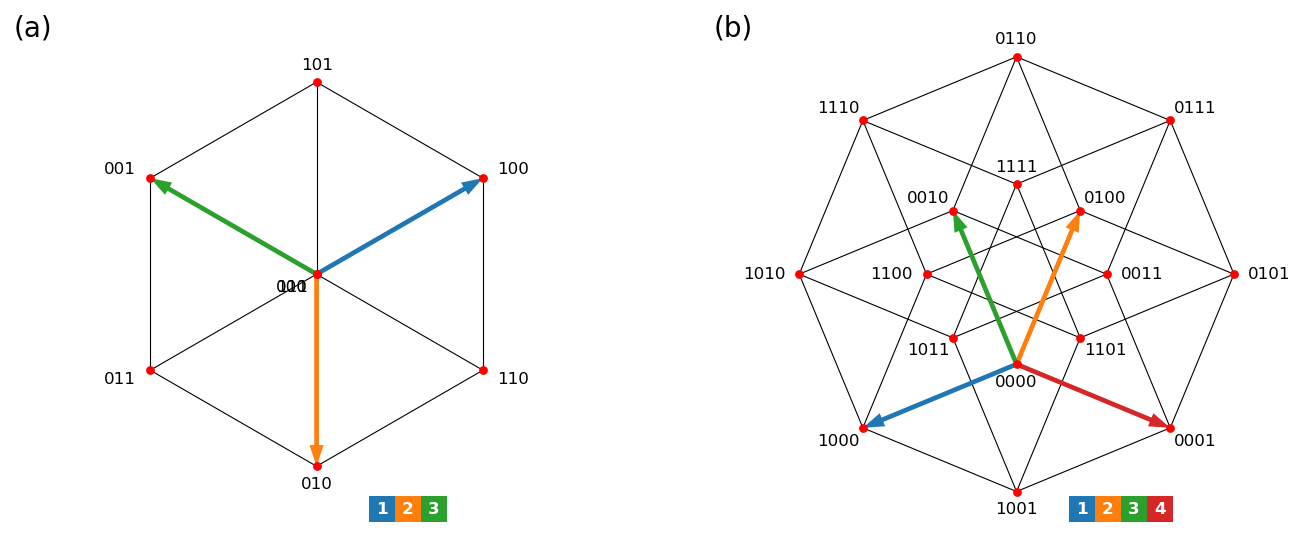

In [9]:
label_pos = [-0.08, 1]
fig, axs = plt.subplots(1, 2, figsize=(7, 8/3), sharex=True, sharey=True)

style = "isometric"
Ndims = 3
ax = axs[0]
fig, ax = hc.project_hypercube(Ndims, style, plot_basis=True, swapped_id=[0, 2], fig=fig, ax=ax)
ax.text(*label_pos, "(a)", transform=ax.transAxes, fontsize=label_fontsize, ha="left", va="top")
color_indicator(ax, Ndims,)
ax.margins(0.1)
Ndims = 4
ax = axs[1]
fig, ax = hc.project_hypercube(Ndims, style, plot_basis=True, swapped_id=[0, 9], fig=fig, ax=ax)
ax.text(*label_pos, "(b)", transform=ax.transAxes, fontsize=label_fontsize, ha="left", va="top")
color_indicator(ax, Ndims,)
ax.margins(0.1)

fig.savefig("../figures/fig-3.svg")
fig.savefig("../figures/fig-3.pdf")

# Fig. 4

In [10]:
def plot_pca_hamming(Ndims, fig, ax1, ax2, ax3, ax4, ax5, hamming=False):
    style = "wpca"
    if hamming:
        w = 2.0
        weights = np.ones(2**Ndims)
        weights[0b0000] = w
        weights[0b1111] = w
        symmetric_weights=True
    else:
        seed = 42
        rng = np.random.default_rng(seed)
        weights = rng.uniform(size=2**Ndims)
        symmetric_weights=False
    weights /= weights.sum()
    ax = ax1
    fig, ax, pca = hc.project_hypercube(
        Ndims,
        style,
        plot_label=False,
        plot_basis=True,
        s=weights**2*10000,
        lw=0.2,
        weights=weights,
        symmetric_weights=symmetric_weights,
        return_pca=True,
        fig=fig,
        ax=ax
    )
    color_indicator(ax, Ndims, lower_left_x=0.7, lower_left_y=-0.2, fontsize=7)

    ax = ax2
    eigenvalues = pca.explained_variance_ratio_
    ax.scatter(np.arange(len(eigenvalues)) + 1, eigenvalues, c='k')
    ax.set_xlabel("PC$i$")
    ax.set_ylabel("Fraction of\nexplained variance $\\tilde{\\lambda}_i$")
    ax.set_xticks(np.arange(len(eigenvalues)) + 1)
    ax.set_xlim(0.75, 4.25)
    ax.set_ylim(0.0, np.max(eigenvalues)*1.1)

    ax = ax3
    eigenvectors = pca.components_[0]
    bars = ax.bar(np.arange(len(eigenvalues)) + 1, eigenvectors)
    for i, bar in enumerate(bars):
        bar.set_facecolor(f"C{i}")
    ax.set_xlabel("Variable")
    ax.set_ylabel("PC1 loading")
    ax.axhline(0, c="k", ls="--", lw=0.56,)# zorder=0)
    ax = ax4
    eigenvectors = pca.components_[1]
    bars = ax.bar(np.arange(len(eigenvalues)) + 1, eigenvectors)
    for i, bar in enumerate(bars):
        bar.set_facecolor(f"C{i}")
    ax.set_xlabel("Variable")
    ax.set_ylabel("PC2 loading")
    ax.axhline(0, c="k", ls="--", lw=0.56,)# zorder=0)
    ax.set_xticks(np.arange(len(eigenvalues)) + 1)

    ax = ax5
    fig, ax = hc.project_hypercube(
        Ndims,
        style,
        plot_label=False,
        plot_basis=False,
        #basis_width=0.02,
        s=0,
        lw=0.2,
        weights=weights,
        symmetric_weights=symmetric_weights,
        plot_hamiltonian_path=True,
        fig=fig,
        ax=ax,
    )
    return fig

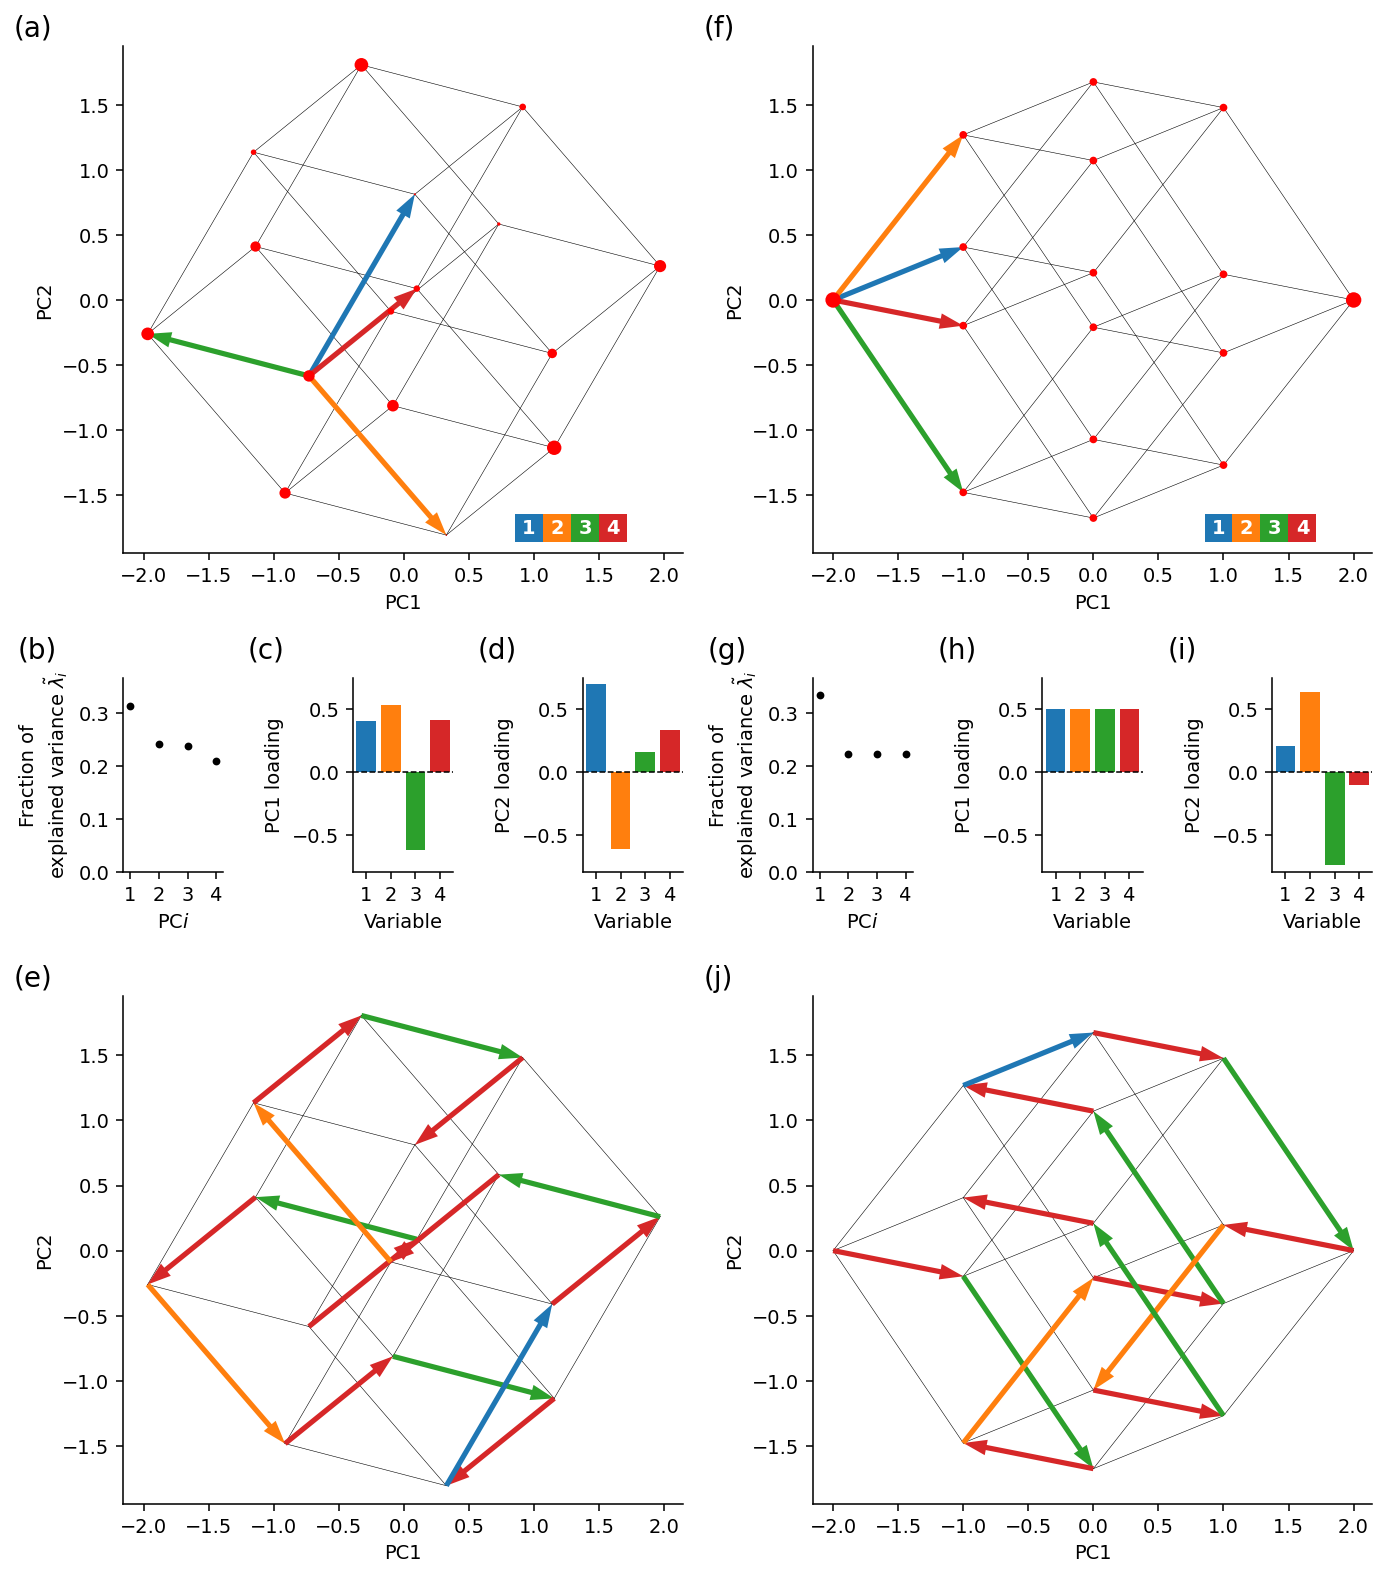

In [11]:
fig = plt.figure(figsize=(7, 8), layout="tight")
gs = fig.add_gridspec(3, 6, height_ratios=(3, 1, 3),)
ax1 = fig.add_subplot(gs[0, :3])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2], sharex=ax3, sharey=ax3)
ax5 = fig.add_subplot(gs[2, :3], sharex=ax1, sharey=ax1)

ax6 = fig.add_subplot(gs[0, 3:], sharex=ax1, sharey=ax1)
ax7 = fig.add_subplot(gs[1, 3], sharex=ax2, sharey=ax2)
ax8 = fig.add_subplot(gs[1, 4], sharex=ax3, sharey=ax3)
ax9 = fig.add_subplot(gs[1, 5], sharex=ax8, sharey=ax8)
ax10 = fig.add_subplot(gs[2, 3:], sharex=ax5, sharey=ax5)

Ndims = 4
plot_pca_hamming(4, fig, ax1, ax2, ax3, ax4, ax5)
ax = ax1
ax.text(-0.195, 1.02, "(a)", fontsize=label_fontsize, transform=ax.transAxes)
ax = ax2
ax.text(-1.05, 1.1, "(b)", fontsize=label_fontsize, transform=ax.transAxes)
ax = ax3
ax.text(-1.05, 1.1, "(c)", fontsize=label_fontsize, transform=ax.transAxes)
ax = ax4
ax.text(-1.05, 1.1, "(d)", fontsize=label_fontsize, transform=ax.transAxes)
ax = ax5
ax.text(-0.195, 1.02, "(e)", fontsize=label_fontsize, transform=ax.transAxes)

plot_pca_hamming(4, fig, ax6, ax7, ax8, ax9, ax10, True)
ax = ax6
ax.text(-0.195, 1.02, "(f)", fontsize=label_fontsize, transform=ax.transAxes)
ax = ax7
ax.text(-1.05, 1.1, "(g)", fontsize=label_fontsize, transform=ax.transAxes)
ax = ax8
ax.text(-1.05, 1.1, "(h)", fontsize=label_fontsize, transform=ax.transAxes)
ax = ax9
ax.text(-1.05, 1.1, "(i)", fontsize=label_fontsize, transform=ax.transAxes)
ax = ax10
ax.text(-0.195, 1.02, "(j)", fontsize=label_fontsize, transform=ax.transAxes)

fig.savefig("../figures/fig-4.svg")
fig.savefig("../figures/fig-4.pdf")

In [12]:
def plot_pca(Ndims, fig, axs):
    style = "wpca"
    seed = 42
    rng = np.random.default_rng(seed)
    weights = rng.uniform(size=2**Ndims)
    weights[0b0000] = 3
    weights[0b1111] = 3
    weights[0b0011] = 2
    weights[0b1100] = 2
    weights[0b0101] = 1
    weights[0b1010] = 1
    weights /= weights.sum()
    xcomponent = 0
    ycomponent = 1
    ax = axs[0]
    fig, ax, pca = hc.project_hypercube(
        Ndims,
        style,
        plot_label=False,
        plot_basis=True,
        return_pca=True,
        s=weights**2*10000,
        lw=0.2,
        #basis_width=0.02,
        xcomponent=xcomponent,
        ycomponent=ycomponent,
        weights=weights,
        symmetric_weights=False,
        fig=fig,
        ax=ax
    )
    color_indicator(ax, Ndims, lower_left_y=-0.2, fontsize=7)
    ax.axhline(0, c='k', ls='--', lw=0.56, zorder=0, )
    ax.axvline(0, c='k', ls='--', lw=0.56, zorder=0)
    ratio = 0.95
    target_coord = pca.transform(np.array([1, 1, 1, 1]))
    ax.arrow(ratio*target_coord[xcomponent], ratio*target_coord[ycomponent], 0.8*(1-ratio)*target_coord[xcomponent], 0.8*(1-ratio)*target_coord[ycomponent],
             length_includes_head=True,
             head_width=0.12, head_length=1.0*0.12, fc='k', zorder=4)
    ax.plot([0, ratio*target_coord[xcomponent]], [0, ratio*target_coord[ycomponent]], c='k', ls="--", lw=1.5)
    theta1 = np.arctan2(target_coord[ycomponent], target_coord[xcomponent])
    theta1 = np.rad2deg(theta1)
    target_coord = pca.transform(np.array([-1, 1, 1, 1]))
    ax.arrow(ratio*target_coord[xcomponent], ratio*target_coord[ycomponent], 0.8*(1-ratio)*target_coord[xcomponent], 0.8*(1-ratio)*target_coord[ycomponent],
             length_includes_head=True,
             head_width=0.12, head_length=1.0*0.12, fc='k', zorder=4)
    ax.plot([0, ratio*target_coord[xcomponent]], [0, ratio*target_coord[ycomponent]], c='k', ls="--", lw=1.5)
    theta2 = np.arctan2(target_coord[ycomponent], target_coord[xcomponent])
    theta2 = np.rad2deg(theta2)
    e = patches.Arc((0, 0), 1, 1,
                     theta1=theta1, theta2=theta2, lw=1.0, ls="--", fill=False, zorder=2)
    ax.add_patch(e)
    #axin = ax.inset_axes([1.7, 0.5, 1, 1], transform=ax.transData)
    box_size = 0.08
    boxes = [patches.Rectangle([1.9+0.1*i, -0.25], box_size, box_size,) for i in range(4)]
    pc = PatchCollection(boxes, lw=0.2, fc='k', ec='k')
    ax.add_collection(pc)
    #ax.text(2.0, -0.23, r"$\boldsymbol{s}_{16}$", ha='left', va='top', fontsize=10)

    boxes = [patches.Rectangle([0.8+0.1*i, 0.6], box_size, box_size,) for i in range(4)]
    pc = PatchCollection(boxes, lw=0.2, fc=['w', 'k', 'k', 'k'], ec='k')
    ax.add_collection(pc)
    #ax.text(0.9, 0.62, r"$\boldsymbol{s}_{8}$", ha='left', va='top', fontsize=10)

    xcomponent = 0
    ycomponent = 2
    ax = axs[1]
    fig, ax, pca = hc.project_hypercube(
        Ndims,
        style,
        plot_label=False,
        plot_basis=True,
        return_pca=True,
        s=weights**2*10000,
        lw=0.2,
        #basis_width=0.02,
        xcomponent=xcomponent,
        ycomponent=ycomponent,
        weights=weights,
        symmetric_weights=False,
        fig=fig,
        ax=ax
    )
    color_indicator(ax, Ndims, lower_left_y=-0.2, fontsize=7)

    ax = axs[2]
    eigenvalues = pca.explained_variance_ratio_
    ax.scatter(np.arange(len(eigenvalues)) + 1, eigenvalues, c='k')
    ax.set_xlabel("PC$i$")
    ax.set_ylabel("Fraction of\nexplained variance $\\tilde{\\lambda}_i$")
    ax.set_xticks(np.arange(len(eigenvalues)) + 1)
    ax.set_ylim(0.0, np.max(eigenvalues)*1.1)

    ax = axs[3]
    eigenvectors = pca.components_[0]
    bars = ax.bar(np.arange(len(eigenvalues)) + 1, eigenvectors)
    for i, bar in enumerate(bars):
        bar.set_facecolor(f"C{i}")
    ax.set_xlabel("Variable")
    ax.set_ylabel("PC1 loading")
    ax.axhline(0, c="k", ls="--", lw=0.56,)# zorder=0)

    ax = axs[4]
    eigenvectors = pca.components_[1]
    bars = ax.bar(np.arange(len(eigenvalues)) + 1, eigenvectors)
    for i, bar in enumerate(bars):
        bar.set_facecolor(f"C{i}")
    ax.set_xlabel("Variable")
    ax.set_ylabel("PC2 loading")
    ax.axhline(0, c="k", ls="--", lw=0.56,)# zorder=0)
    ax.set_xticks(np.arange(len(eigenvalues)) + 1, )

    ax = axs[5]
    eigenvectors = pca.components_[2]
    bars = ax.bar(np.arange(len(eigenvalues)) + 1, eigenvectors)
    for i, bar in enumerate(bars):
        bar.set_facecolor(f"C{i}")
    ax.set_xlabel("Variable")
    ax.set_ylabel("PC3 loading")
    ax.axhline(0, c="k", ls="--", lw=0.56,)# zorder=0)
    ax.set_xticks(np.arange(len(eigenvalues)) + 1, )

    return fig

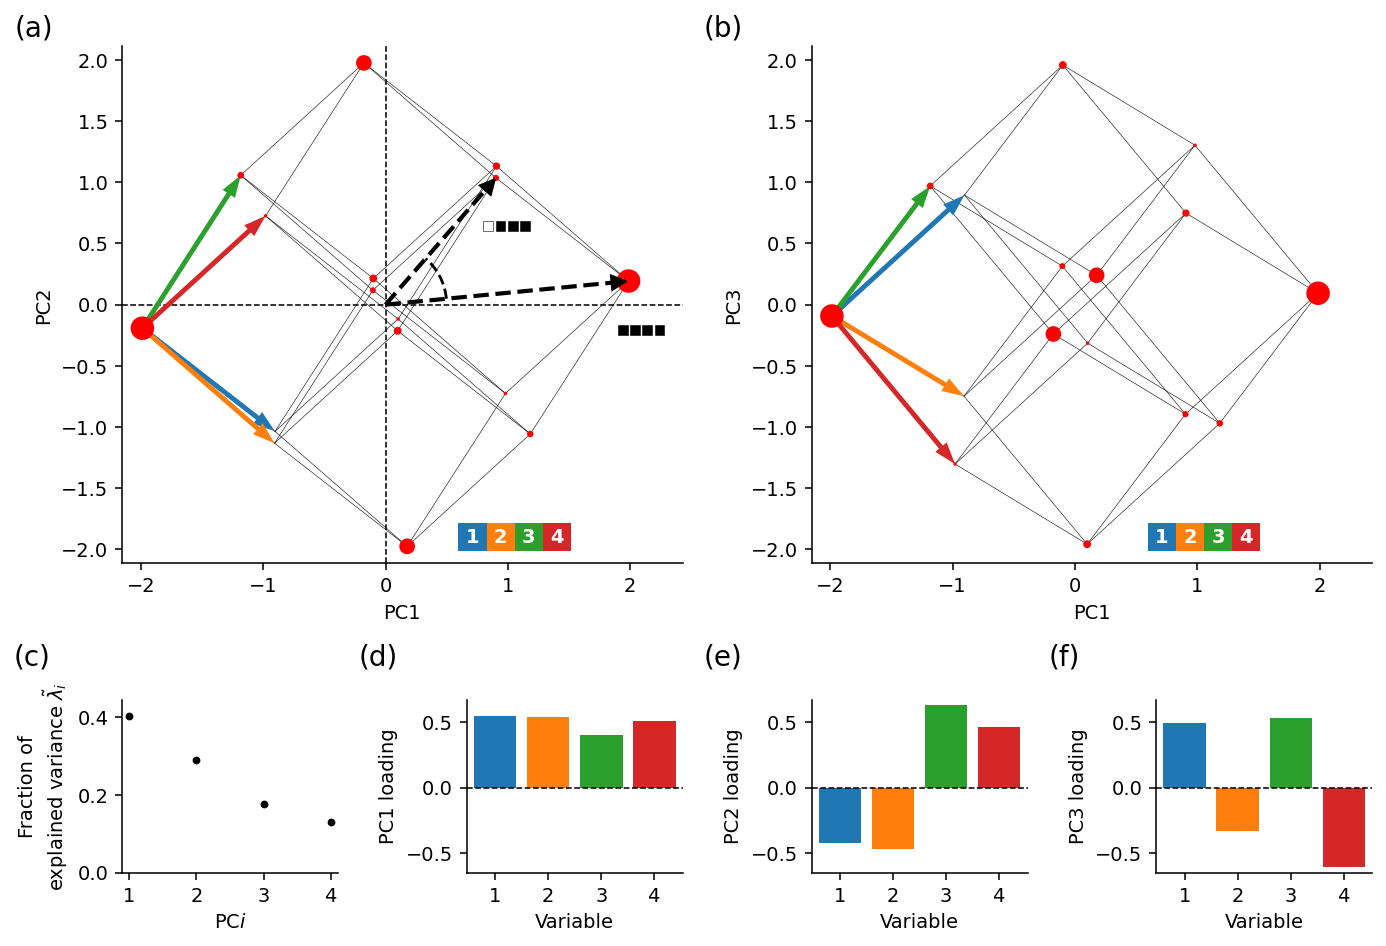

In [13]:
fig = plt.figure(figsize=(7, 4.8), layout='tight')
gs = fig.add_gridspec(2, 8, height_ratios=(3, 1),)
ax1 = fig.add_subplot(gs[0, :4])
ax2 = fig.add_subplot(gs[0, 4:], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(gs[1, 0:2])
ax4 = fig.add_subplot(gs[1, 2:4])
ax5 = fig.add_subplot(gs[1, 4:6], sharex=ax4, sharey=ax4)
ax6 = fig.add_subplot(gs[1, 6:8], sharex=ax4, sharey=ax4)
axs = [ax1, ax2, ax3, ax4, ax5, ax6,]

plot_pca(4, fig, axs)
ax = ax1
ax.text(-0.192, 1.02, "(a)", fontsize=label_fontsize, transform=ax.transAxes)
ax = ax2
ax.text(-0.192, 1.02, "(b)", fontsize=label_fontsize, transform=ax.transAxes)
ax = ax3
ax.text(-0.5, 1.2, "(c)", fontsize=label_fontsize, transform=ax.transAxes)
ax = ax4
ax.text(-0.5, 1.2, "(d)", fontsize=label_fontsize, transform=ax.transAxes)
ax = ax5
ax.text(-0.5, 1.2, "(e)", fontsize=label_fontsize, transform=ax.transAxes)
ax = ax6
ax.text(-0.5, 1.2, "(f)", fontsize=label_fontsize, transform=ax.transAxes)

fig.savefig("../figures/fig-5.svg")
fig.savefig("../figures/fig-5.pdf")

# Fig. 6

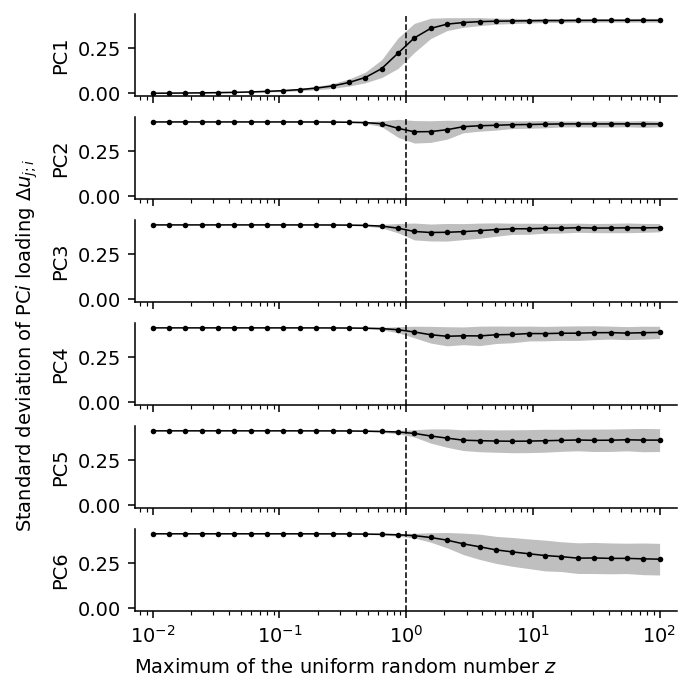

In [14]:
Ndims = 6
style = "wpca"
seed = 42
rng = np.random.default_rng(seed)
num_samples = 1024


zs = np.geomspace(1e-2, 1e+2, 32)
pc_id = 1

data = []
for z in zs:
    samples = []
    for sample in range(num_samples):
        weights = rng.uniform(0, z, size=2**Ndims)
        weights[2**(Ndims-1):] = weights[:2**(Ndims-1)-1:-1]
        weights[0] = 1
        weights[-1] = 1
        weights /= weights.sum()

        results = hc.calc_hypercube_coordinates(
            num_dimensions=Ndims,
            style=style,
            weights=weights,
        )
        pca = results.pca
        pc = pca.components_
        samples.append(pc)
    data.append(samples)
data = np.array(data)
order = data.std(axis=3)
order_mean = order.mean(axis=1)
order_std = order.std(axis=1)

fig, axs = plt.subplots(Ndims, 1, figsize=(3.375, 3.375), sharex=True, sharey=True)
for i in range(Ndims):
    ax = axs[i]
    ax.plot(zs, order_mean[:, i], c='k', marker='o', ms=2, lw=0.56)
    lower_y = order_mean[:, i] - order_std[:, i]
    upper_y = order_mean[:, i] + order_std[:, i]
    ax.fill_between(zs, lower_y, upper_y, color='gray', alpha=0.5, lw=0, zorder=-1)
    ax.set_xscale("log")
    ax.set_ylabel(f"PC{i+1}")
    ax.axvline(1, c='k', ls='--', zorder=0, lw=0.56)
fig.supxlabel("Maximum of the uniform random number $z$")
fig.supylabel("Standard deviation of PC$i$ loading $\\Delta u_{j;i}$")

fig.savefig("../figures/fig-6.svg")
fig.savefig("../figures/fig-6.pdf")

# Fig. 7

In [15]:
styles = [
    "isometric",
    "isometric",
    "hamming",
    "hamming",
    "fractal",
    "fractal",
    "wpca",
    "wpca",
    "wpca",
    "wpca",
]
num_dims = [3, 4, 3, 4, 6, 8, 4, 4, 4, 4]
distortions = [0, 0, 0, 0, 0, 0, 0.0, 0.0, 0, 0]
titles = [
    "Isometric 3D\n",
    "Isometric 4D\n",
    "Hamming 3D\n",
    "Hamming 4D\n",
    "Fractal 6D\n",
    "Fractal 8D\n",
    "PC1–PC2 4D\nrandom",
    "PC1–PC2 4D\nbipolar",
    "PC1–PC2 4D\nsexapolar",
    "PC1–PC3 4D\nsexapolar",
]
weights_list = []

Ndims = 4
# Fig 4 left
seed = 42
rng = np.random.default_rng(seed)
weights = rng.uniform(size=2**Ndims)
weights /= weights.sum()
weights_list.append(weights)
# Fig 4 right
w = 2
weights = np.ones(2**Ndims)
weights[0b0000] = w
weights[0b1111] = w
weights /= weights.sum()
weights_list.append(weights)
# Fig 5 left
seed = 42
rng = np.random.default_rng(seed)
weights = rng.uniform(size=2**Ndims)
w = 3
weights[0b0000] = w
weights[0b1111] = w
weights[0b0011] = w*0.6
weights[0b1100] = w*0.6
weights[0b0101] = w*0.4
weights[0b1010] = w*0.4
weights /= weights.sum()
weights_list.append(weights)
weights_list.append(weights)

RMSE predicted:  1.2661862290796508
RMSE actual   :  1.2661862290796508
RMSE predicted:  1.257078722109418
RMSE actual   :  1.2570787221094177
RMSE predicted:  0.9437055772896534
RMSE actual   :  0.9437055772896532
RMSE predicted:  1.1938779357649845
RMSE actual   :  1.1938779357649838


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


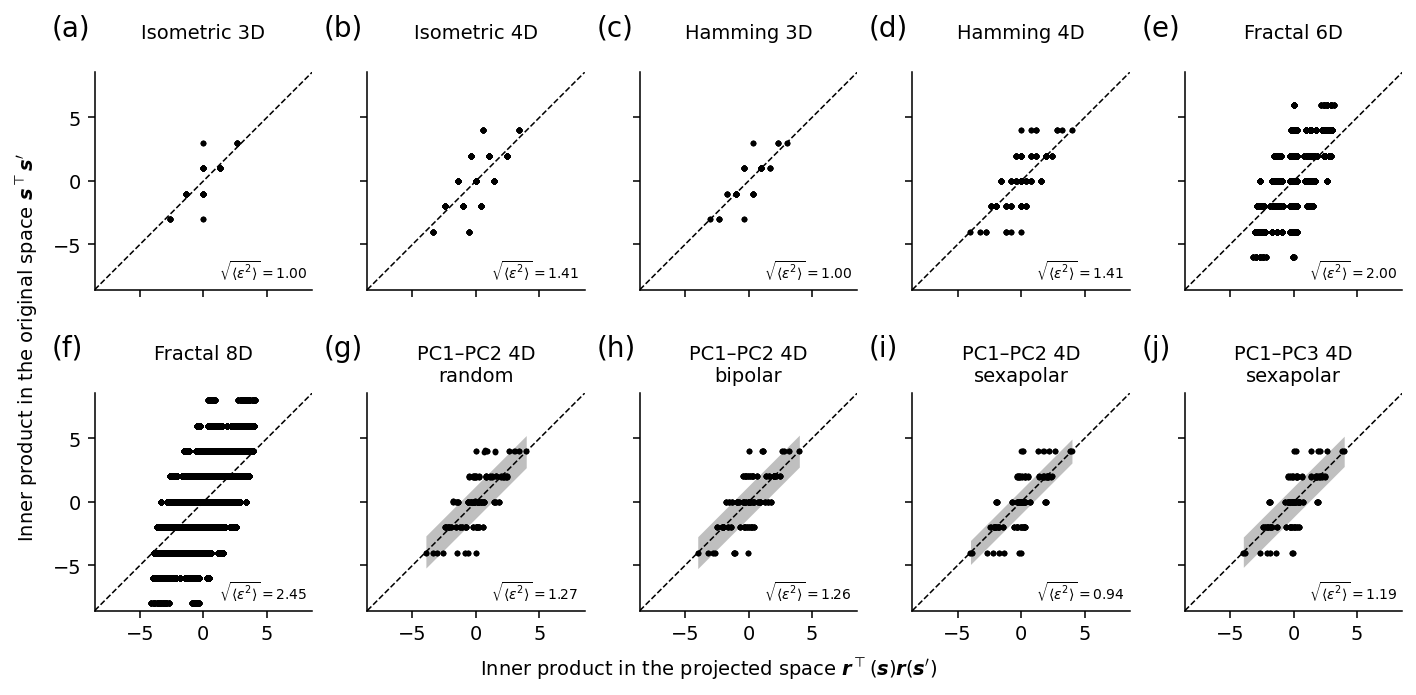

In [16]:
seed = 42
rng = np.random.default_rng(seed)

fig, axs = plt.subplots(2, 5, figsize=(7, 3.4), sharex=True, sharey=True)
labels = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]
for k in range(len(styles)):
    style = styles[k]
    num_dim = num_dims[k]
    distortion = distortions[k]
    title = titles[k]
    xcomponent = 0
    ycomponent = 1
    if style == "wpca":
        weights = weights_list[k-6]
    else :
        weights = np.ones(2**num_dim)
        weights /= weights.sum()
    if k == (len(styles) - 1):
        ycomponent = 2

    if k in [6, 8, 9]:
        symmetric_weights=False
    else :
        symmetric_weights=True
    results = hc.calc_dot_product_between_vertices(
        num_dimensions=num_dim,
        style=style,
        distortion=distortion,
        weights=weights,
        symmetric_weights=symmetric_weights,
        xcomponent=xcomponent,
        ycomponent=ycomponent,
    )
    dot_prod_projected = results.dot_prod_projected
    dot_prod_isings = results.dot_prod_isings
    weights_prod = results.weights_prod

    i = k // 5
    j = k % 5
    ax = axs[i, j]
    ax.scatter(
        dot_prod_projected,
        dot_prod_isings,
        lw=0,
        rasterized=True,
        c='k',
    )
    ax.axline((0, 0), slope=1, c="k", ls="--", lw=0.56, zorder=0)
    ax.set_title(title)
    ax.text(-0.20, 1.17, f"({labels[k]})", transform=ax.transAxes, fontsize=label_fontsize)
    ax.set_aspect("equal")
    ylim = ax.get_ylim()
    ax.set_xlim(ylim)

    mean_square_error = weights_prod * np.square((dot_prod_isings - dot_prod_projected))
    RMSE_actual = np.sqrt(np.sum(mean_square_error))
    ax.text(0.57, 0.05, f"$\\sqrt{{\\left<\\varepsilon^2\\right>}}={RMSE_actual:.2f}$", transform=ax.transAxes, fontsize=5)
    if style == 'wpca':
        explained_variance = results.pca.explained_variance_
        RMSE_predicted = np.sqrt(np.sum(np.square(np.delete(explained_variance, [xcomponent, ycomponent]))))
        x = np.linspace(dot_prod_projected.min(), dot_prod_projected.max(), 100)
        upper_y = x + RMSE_predicted
        lower_y = x - RMSE_predicted
        ax.fill_between(x, lower_y, upper_y, alpha=0.5, zorder=-1, color='gray', lw=0)
        print("RMSE predicted: ", RMSE_predicted)
        print("RMSE actual   : ", RMSE_actual)
equation='$\\boldsymbol{r}^\\top\\left(\\boldsymbol{s}\\right) \\boldsymbol{r}\\left(\\boldsymbol{s}^\\prime\\right)$'
fig.supxlabel("Inner product in the projected space " + equation)
fig.supylabel("Inner product in the original space $\\boldsymbol{s}^\\top \\boldsymbol{s}^\\prime$")

fig.savefig("../figures/fig-7.svg")
fig.savefig("../figures/fig-7.pdf")

# Fig. 8

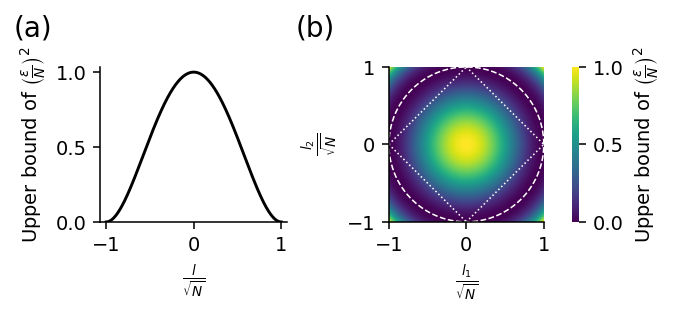

In [17]:
fig, axs = plt.subplots(1, 3, width_ratios=[1, 1, 0.04], figsize=(3.375, 1.5))

factor = 100
x = np.linspace(-1, 1, 1001)
y = (1 - x**2)**2
ax = axs[0]
ax.plot(x, y, c='k')
ax.set_ylim(0)
ax.set_xlabel(r'$\frac{l}{\sqrt{N}}$')
ax.set_ylabel(r'Upper bound of $\left(\frac{\varepsilon}{N}\right)^2$')
ax.text(-0.46, 1.2, "(a)", transform=ax.transAxes, fontsize=label_fontsize)

x = np.linspace(-1, 1, 1001)
y = x.copy()
xx, yy = np.meshgrid(x, y)
zz = (1 - xx**2 - yy**2)**2
ax = axs[1]
cbar = ax.pcolormesh(xx, yy, zz, rasterized=True)
ax.axline((0, 1), slope=-1, c='w', ls=':', lw=0.56)
ax.axline((0, -1), slope=-1, c='w', ls=':', lw=0.56)
ax.axline((1, 0), slope=1, c='w', ls=':', lw=0.56)
ax.axline((-1, 0), slope=1, c='w', ls=':', lw=0.56)
theta = np.linspace(0, 2*np.pi, 1001)
x = np.cos(theta)
y = np.sin(theta)
ax.plot(x, y, c='w', ls='--', lw=0.56)
ax.set_aspect('equal')
ax.set_xlabel(r'$\frac{l_1}{\sqrt{N}}$')
ax.set_ylabel(r'$\frac{l_2}{\sqrt{N}}$')
ax.text(-0.6, 1.2, "(b)", transform=ax.transAxes, fontsize=label_fontsize)

ax = axs[2]
colorbar = fig.colorbar(cbar, ax, label=r'Upper bound of $\left(\frac{\varepsilon}{N}\right)^2$')
colorbar.outline.set_visible(False)

fig.savefig("../figures/fig-8.svg")
fig.savefig("../figures/fig-8.pdf")

# Fig. 9

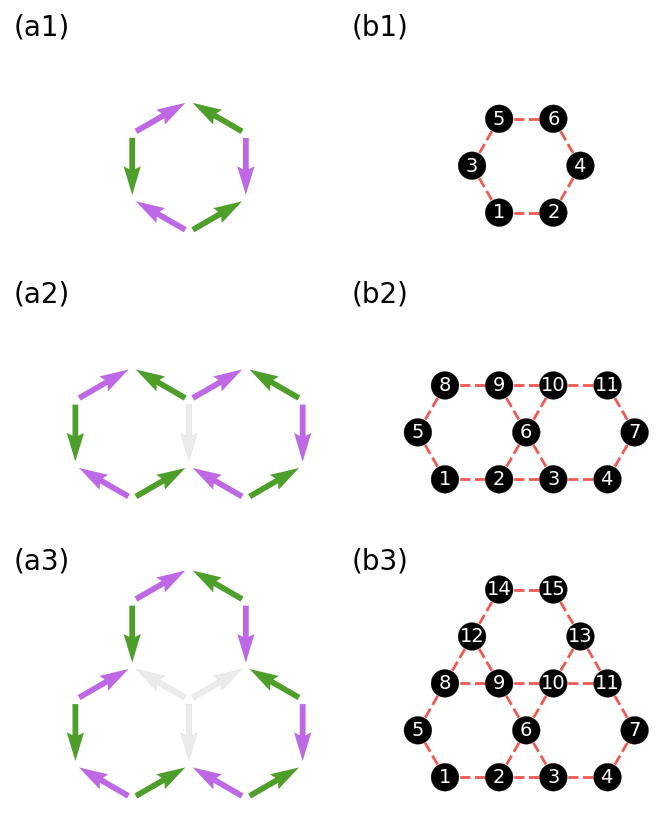

In [18]:
fig, axs = plt.subplots(3, 2,
                        figsize=(3.375, 4),
                       )

for j in range(3):
    im, coord, arrow = ns.Farhan2013(j+1)

    ax = axs[j, 0]
    ax = ns.plot_kagome_spin_ice(coord, arrow, ax=ax,)
    ax.set_xlim(-2.2, 2.2)
    ax.set_ylim(-1.8, 2.3)
    ax.text(-0.2, 1, f"(a{j+1})",
            fontsize=label_fontsize,
            transform=ax.transAxes)

    ax = axs[j, 1]
    ax = ns.plot_kagome_network(im, coord, ax=ax, labels='auto', node_size=100, font_size=7)
    ax.set_xlim(-2.3, 2.3)
    ax.set_ylim(-1.9, 2.4)
    ax.text(-0.2, 1, f"(b{j+1})",
            fontsize=label_fontsize,
            transform=ax.transAxes)

fig.savefig("../figures/fig-9.svg")
fig.savefig("../figures/fig-9.pdf")

# Fig. 10

In [19]:
def plot_state(im, coord, arrow, state, node_size, figsize, path_pdf, path_svg):
    fig, axs= plt.subplots(2, 1, figsize=figsize)
    ax = axs[0]
    ax = ns.plot_kagome_spin_ice(coord, arrow, ax=ax, states1d=state)
    ax = axs[1]
    ax = ns.plot_kagome_network(im, coord, ax=ax, labels=None, node_color=state, node_size=node_size)
    ax.margins(0.25)
    fig.savefig(path_pdf)
    fig.savefig(path_svg)

In [20]:
def plot_kagome_network_with_biplot_colors(fig, axs, xcomponent=0, ycomponent=1,
                                           flip_xbasis=[False, False, False], flip_ybasis=[False, False, False],
                                           path_save=None):
    T = 0.3
    annotate_axis = []

    for j in range(3):
        im, coord, arrow = ns.Farhan2013(j+1)

        energy, probability = ns.calc_energy_and_canonical_probability(im, T)
        Ndims = len(im)
        style = 'wpca'

        results = hc.calc_hypercube_coordinates(
            num_dimensions=Ndims,
            style=style,
            weights=probability,
        )
        pca = results.pca
        eigenvector = pca.components_
        basis = np.vstack((eigenvector[xcomponent], eigenvector[ycomponent]))
        basis = basis.T
        if flip_xbasis[j]:
            basis[:, 0] = -basis[:, 0]
        if flip_ybasis[j]:
            basis[:, 1] = -basis[:, 1]

        angles = np.arctan2(basis[:, 1], basis[:, 0])
        norm_angles = (angles + np.pi) / (2 * np.pi)

        ax = axs[j]
        ax = ns.plot_kagome_network(im, 1.2*coord, ax=ax, node_size=120, node_color=norm_angles, labels='auto', font_size=8, cmap=plt.cm.turbo, vmin=0, vmax=1)
        ax.text(-0.12, 1.04, f"(b{j+1})",
                fontsize=12,
                transform=ax.transAxes)

    return fig, ax

In [21]:
def plot_pca_and_biplot(fig, axs, xcomponent=0, ycomponent=1,
                        flip_xbasis=[False, False, False], flip_ybasis=[False, False, False],
                        annot_coords1=None, annot_coords2=None,
                        inset_width1=1, inset_width2=1.8, inset_width3=1.2):
    T = 0.3
    thresholds = [1e-7, 1e-6, 2e-6]
    seed = 42
    rng = np.random.default_rng(seed)

    counter = 0
    for j in range(3):
        im, coord, arrow = ns.Farhan2013(j+1)

        energy, probability = ns.calc_energy_and_canonical_probability(im, T)
        Ndims = len(im)
        style = 'wpca'

        # landscape with captions
        ax = axs[counter]
        counter += 1
        fig, ax, pca = hc.project_hypercube(
            Ndims,
            style,
            xcomponent=xcomponent,
            ycomponent=ycomponent,
            plot_label=False,
            plot_basis=False,
            return_pca=True,
            s=20,
            marker_lw=0.1,
            lw=0.1,
            basis_width=0.02,
            flip_xbasis=flip_xbasis[j],
            flip_ybasis=flip_ybasis[j],
            weights=probability,
            weights_threshold=thresholds[j],
            vertex_colors=energy,
            fig=fig,
            ax=ax,
            vertex_cmap=cc.cm.CET_D9,
        )

        eigenvector = pca.components_
        basis = np.vstack((eigenvector[xcomponent], eigenvector[ycomponent]))
        basis = basis.T
        if flip_xbasis[j]:
            basis[:, 0] = -basis[:, 0]
        if flip_ybasis[j]:
            basis[:, 1] = -basis[:, 1]
        hc.draw_basis([3, 3], 2*basis, ax, 0.04, cc.cm.rainbow4, True, False,)

        # example path
        angles = np.arctan2(basis[:, 1], basis[:, 0])
        norm_angles = (angles + np.pi) / (2 * np.pi)
        if j == 0 and xcomponent == 0 and ycomponent == 1:
            annot_coords = annot_coords1
            path_spin = np.array([2, 1, 3, 5, 6, 4])-1
            initial_state = np.array(
                [-1, +1, +1, -1, -1, +1]
                )
            state = initial_state.copy()

            for i in range(len(path_spin)):
                changed_spin = path_spin[i]
                annot_coord = annot_coords1[i]
                source = state.copy()
                target = state.copy()
                target[changed_spin] *= -1
                states = np.vstack((source, target))
                projected_coord = states@basis
                ax = axs[j]
                ax.plot(projected_coord[:, xcomponent], projected_coord[:, ycomponent],
                        c=cc.cm.rainbow4(norm_angles[changed_spin]),
                        zorder=0)
                state_coord = np.array([projected_coord[0, xcomponent], projected_coord[0, ycomponent]])
                ax.annotate("",
                            state_coord,
                            annot_coord,
                            arrowprops=dict(facecolor='black', arrowstyle="->", lw=0.4),
                            transform=ax.transData)
                inset_width = inset_width1
                shiftx = (np.sign(state_coord[0] - annot_coord[0])+1)/2*inset_width - np.sign(state_coord[0] - annot_coord[0])*0.2
                shifty = -inset_width
                axin = ax.inset_axes([annot_coord[0]-shiftx, annot_coord[1]+shifty, inset_width, 2*inset_width], transform=ax.transData)
                shifter = 3*np.vstack((np.zeros(len(im)), np.ones(len(im)))).T
                ns.plot_kagome_spin_ice(coord-coord.mean()+shifter, arrow, ax=axin, states1d=state)
                ns.plot_kagome_network(im, coord-coord.mean()-shifter, ax=axin, labels=None, node_color=state, node_size=5, edge_width_scale=0.4)
                state = target.copy()
                # state visualization
            state_coord = np.array([projected_coord[1, xcomponent], projected_coord[1, ycomponent]])
            annot_coord = annot_coords[-1]
            ax.annotate("",
                        state_coord,
                        annot_coord,
                        arrowprops=dict(facecolor='black', arrowstyle="->", lw=0.4),
                        transform=ax.transData)
            shiftx = (np.sign(state_coord[0] - annot_coord[0])+1)/2*inset_width - np.sign(state_coord[0] - annot_coord[0])*0.2
            shifty = -inset_width
            axin = ax.inset_axes([annot_coord[0]-shiftx, annot_coord[1]+shifty, inset_width, 2*inset_width], transform=ax.transData)
            ns.plot_kagome_spin_ice(coord-coord.mean()+shifter, arrow, ax=axin, states1d=state)
            ns.plot_kagome_network(im, coord-coord.mean()-shifter, ax=axin, labels=None, node_color=state, node_size=5, edge_width_scale=0.4)
        elif j == 1 and xcomponent == 0 and ycomponent == 1:
            inset_width = inset_width2
            ground_states_index = np.argwhere(probability==np.max(probability)).flatten()
            ground_states = hc._int2bin(ground_states_index, len(im))
            states = 2*ground_states-1
            projected_coord = states@basis
            for i in range(len(annot_coords2)):
                state = states[i]
                annot_coord = annot_coords2[i]
                state_coord = np.array([projected_coord[i, xcomponent], projected_coord[i, ycomponent]])
                ax.annotate("",
                            state_coord,
                            annot_coord,
                            arrowprops=dict(facecolor='black', arrowstyle="->", lw=0.4),
                            transform=ax.transData)
                shiftx = -inset_width*0.5
                shifty = -(np.sign(state_coord[1] - annot_coord[1])+1)/2*inset_width + np.sign(state_coord[1] - annot_coord[1])*0.2
                axin = ax.inset_axes([annot_coord[0]+shiftx, annot_coord[1]+shifty, inset_width, inset_width], transform=ax.transData)
                shifter = 3*np.vstack((np.zeros(len(im)), np.ones(len(im)))).T
                ns.plot_kagome_spin_ice(coord-coord.mean()+shifter, arrow, ax=axin, states1d=state,)
                ns.plot_kagome_network(im, coord-coord.mean()-shifter, ax=axin, labels=None, node_color=state, node_size=4, edge_width_scale=0.4)
        elif j == 2 and xcomponent == 0 and ycomponent == 1:
            inset_width = inset_width3
            states = np.array([
                [-1, +1, -1, +1, +1, -1, -1, -1, -1, +1, +1, +1, -1, -1, +1],
                [-1, +1, +1, -1, +1, -1, +1, -1, -1, +1, -1, +1, -1, -1, +1],
            ])
            annot_coords3 = np.array([
                [-3.3, 1.4],
                [-2.4, 2.8],
                [3.3, -1.4],
                [2.4, -2.7],
            ])
            xshifters = np.array([-inset_width*0.5, -inset_width+0.4, -inset_width*0.5, 0-0.4])
            yshifters = np.array([0-0.4, -inset_width, -2*inset_width+0.4, -inset_width])
            states = np.vstack((states, -states))
            projected_coord = states@basis
            for i in range(len(annot_coords3)):
                state = states[i]
                annot_coord = annot_coords3[i]
                state_coord = np.array([projected_coord[i, xcomponent], projected_coord[i, ycomponent]])
                ax.annotate("",
                            state_coord,
                            annot_coord,
                            arrowprops=dict(facecolor='black', arrowstyle="->", lw=0.4),
                            transform=ax.transData)
                shiftx = xshifters[i]
                shifty = yshifters[i]
                axin = ax.inset_axes([annot_coord[0]+shiftx, annot_coord[1]+shifty, inset_width, 2*inset_width], transform=ax.transData)
                shifter = 5*np.vstack((np.zeros(len(im)), np.ones(len(im)))).T
                ns.plot_kagome_spin_ice(coord-coord.mean()+shifter, arrow, ax=axin, states1d=state)
                ns.plot_kagome_network(im, coord-coord.mean()-shifter, ax=axin, labels=None, node_color=state, node_size=1.2, edge_width_scale=0.2)

        ax.set_ylabel(f"PC{ycomponent+1}")
        ax.text(-0.19, 1.04, f"(a{j+1})",
                fontsize=label_fontsize,
                transform=ax.transAxes)

        angles = np.arctan2(basis[:, 1], basis[:, 0])
        norm_angles = (angles + np.pi) / (2 * np.pi)
        # PC1 loadings
        ax = axs[counter]
        counter += 1
        bars = ax.bar(np.arange(len(basis)) + 1, basis[:, 0])
        for i, bar in enumerate(bars):
            bar.set_facecolor(cc.cm.rainbow4(norm_angles[i]))
        ax.axhline(0, c='k', ls='--', lw=0.56,)# zorder=0)
        ax.text(-0.215, 1.1, f"(b{j+1})",
                fontsize=label_fontsize,
                transform=ax.transAxes)
        ax.set_xticks(np.arange(len(basis)) + 1)
        ax.set_xlabel("Variable")
        ax.set_ylabel(f"PC{xcomponent+1} loading")
        # PC2 loadings
        ax = axs[counter]
        counter += 1
        bars = ax.bar(np.arange(len(basis)) + 1, basis[:, 1])
        for i, bar in enumerate(bars):
            bar.set_facecolor(cc.cm.rainbow4(norm_angles[i]))
        ax.axhline(0, c='k', ls='--', lw=0.56,)# zorder=0)
        ax.text(-0.215, 1.1, f"(c{j+1})",
                fontsize=label_fontsize,
                transform=ax.transAxes)
        ax.set_xticks(np.arange(len(basis)) + 1)
        ax.set_xlabel("Variable")
        ax.set_ylabel(f"PC{ycomponent+1} loading")
        # network
        ax = axs[counter]
        counter += 1
        ax = ns.plot_kagome_network(im, 1.2*coord, ax=ax, node_size=80, node_color=norm_angles,
                                    labels='auto', font_size=7, cmap=cc.cm.rainbow4, vmin=0, vmax=1,
                                    edge_width_scale=0.7)
        ax.text(-0.12, 1.1, f"(d{j+1})",
                fontsize=label_fontsize,
                transform=ax.transAxes)
    return fig, axs

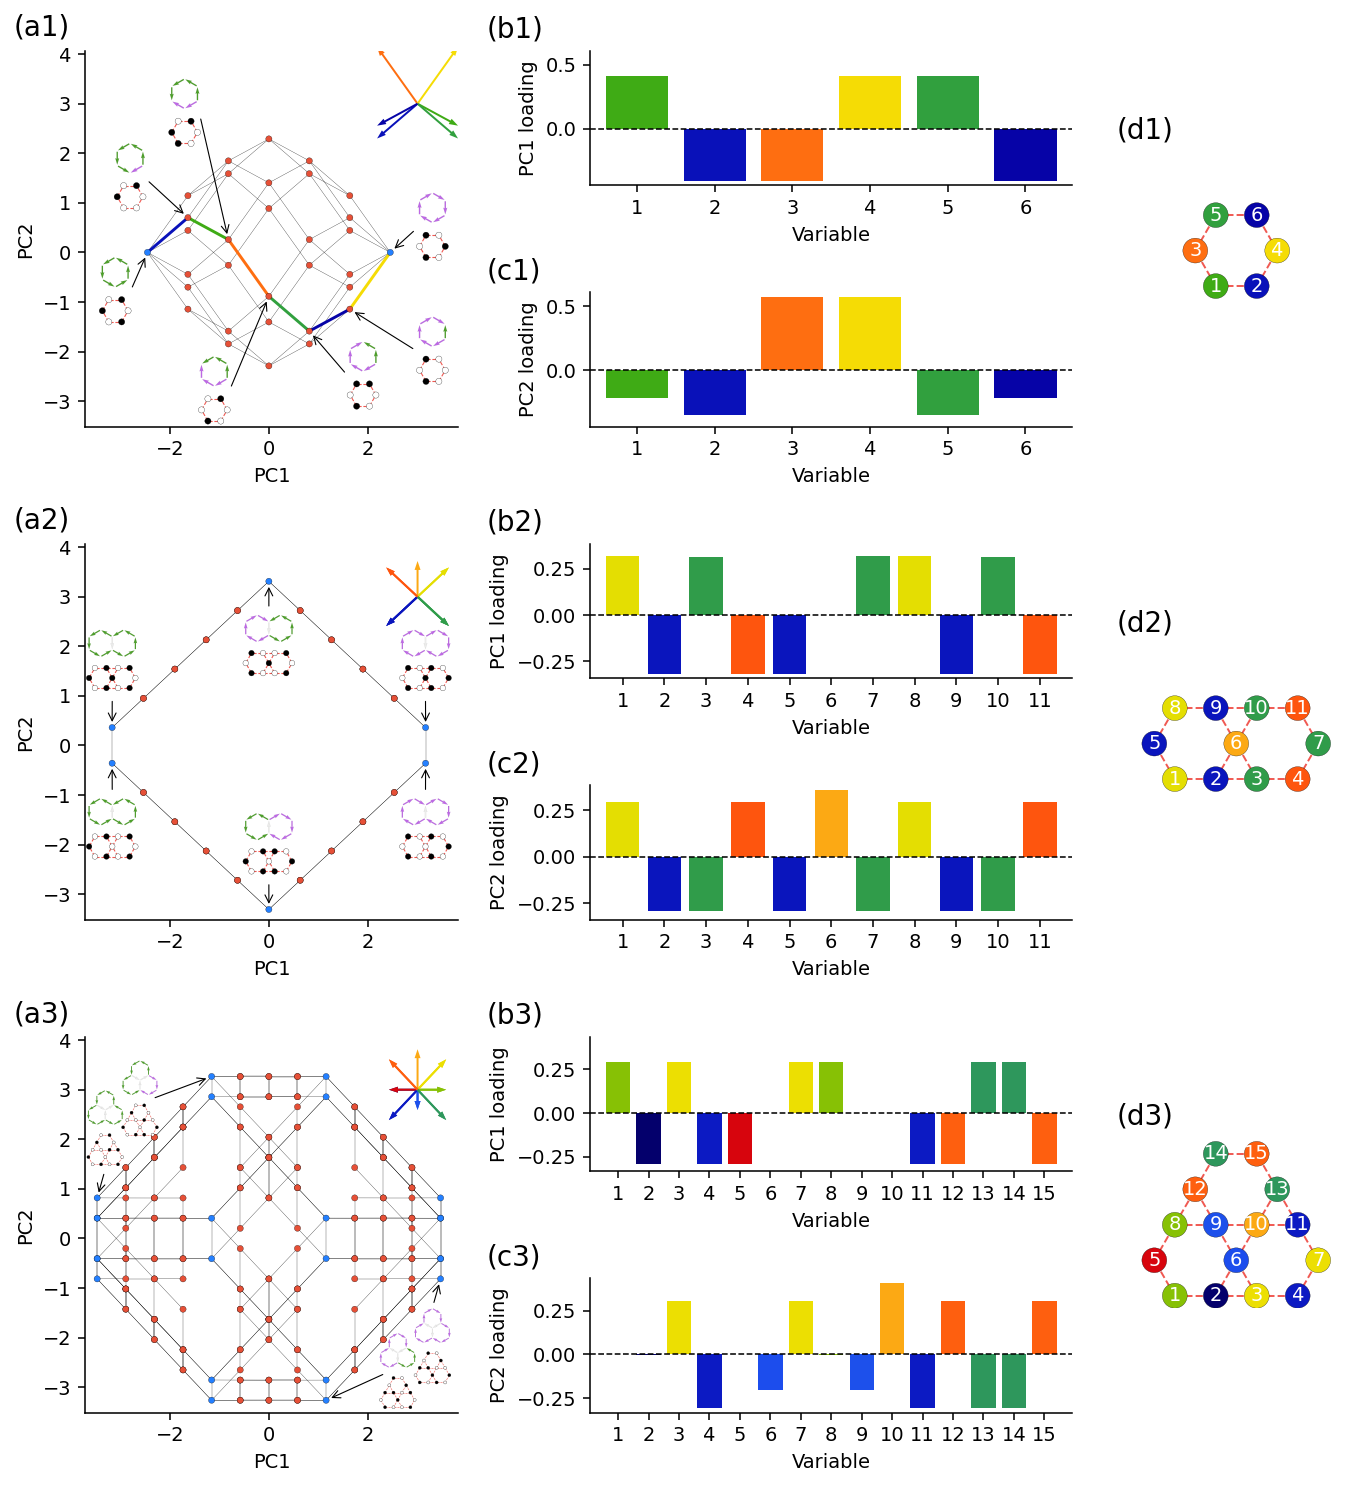

In [22]:
fig = plt.figure(figsize=(7, 7.5), layout='tight')
gs = fig.add_gridspec(3, 2, width_ratios=[1, 1.25])
gs1 = gs[0, 1].subgridspec(2, 2, hspace=0.8, wspace=0.2, width_ratios=[2.5, 1])
gs2 = gs[1, 1].subgridspec(2, 2, hspace=0.8, wspace=0.2, width_ratios=[2.5, 1])
gs3 = gs[2, 1].subgridspec(2, 2, hspace=0.8, wspace=0.2, width_ratios=[2.5, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs1[0, 0])
ax3 = fig.add_subplot(gs1[1, 0], sharex=ax2, sharey=ax2)
ax4 = fig.add_subplot(gs1[:2, 1])
ax5 = fig.add_subplot(gs[1, 0])
ax6 = fig.add_subplot(gs2[0, 0])
ax7 = fig.add_subplot(gs2[1, 0], sharex=ax6, sharey=ax6)
ax8 = fig.add_subplot(gs2[:2, 1], sharex=ax4, sharey=ax4)
ax9 = fig.add_subplot(gs[2, 0])
ax10 = fig.add_subplot(gs3[0, 0])
ax11 = fig.add_subplot(gs3[1, 0], sharex=ax10, sharey=ax10)
ax12 = fig.add_subplot(gs3[:2, 1], sharex=ax4, sharey=ax4)
axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]

annot_coords1 = np.array([
    [-2.8, -0.8],
    [-2.5, 1.5],
    [-1.4, 2.8],
    [-0.8, -2.8],
    [1.6, -2.5],
    [3, -2],
    [3, 0.5],
])
annot_coords2 = np.array([
    [-3.16, -1],
    [-3.16, 1],
    [0, -2.7],
    [0, 2.7],
    [3.16, -1],
    [3.16, 1],
])
flip_xbasis = [True, False, False]
flip_ybasis = [True, True, True]
xcomponent = 0
ycomponent = 1
fig, axs = plot_pca_and_biplot(fig, axs, xcomponent, ycomponent,
                                flip_xbasis=flip_xbasis, flip_ybasis=flip_ybasis,
                                annot_coords1=annot_coords1, annot_coords2=annot_coords2, )
ax1.set_xlim(ax9.get_xlim())
ax1.set_ylim(ax9.get_ylim())
ax5.set_xlim(ax9.get_xlim())
ax5.set_ylim(ax9.get_ylim())

fig.savefig("../figures/fig-10.svg")
fig.savefig("../figures/fig-10.pdf")

# Fig. 11

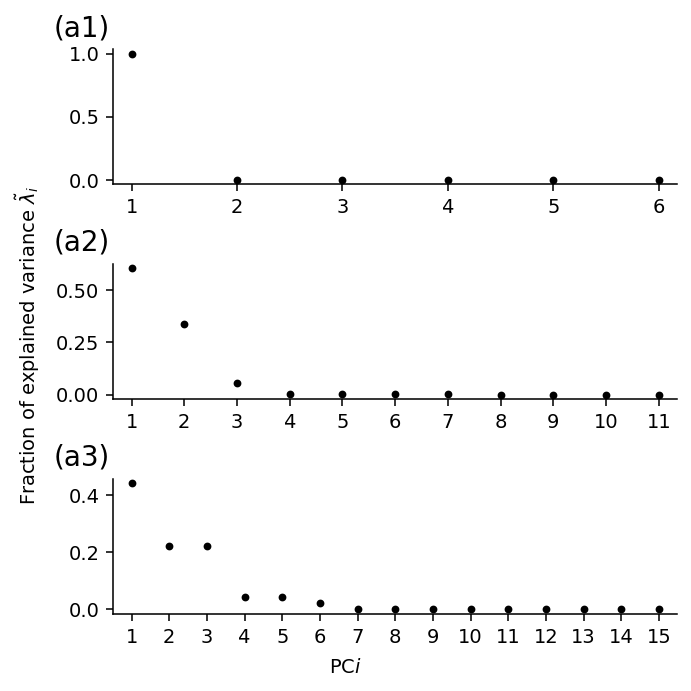

In [23]:
T = 0.3

fig, axs = plt.subplots(3, 1, figsize=(3.375, 3.375), )

for j in range(3):
    im, coord, arrow = ns.Farhan2013(j+1)

    energy, probability = ns.calc_energy_and_canonical_probability(im, T)
    Ndims = len(im)
    style = 'wpca'

    results = hc.calc_hypercube_coordinates(
        num_dimensions=Ndims,
        style=style,
        weights=probability,
    )
    pca = results.pca

    eigenvalues = pca.explained_variance_ratio_
    ax = axs[j]
    ax.scatter(np.arange(len(eigenvalues))+1, eigenvalues, c='k')
    ax.text(-0.105, 1.1, f"(a{j+1})", transform=ax.transAxes, fontsize=label_fontsize)
    ax.set_xticks(np.arange(len(eigenvalues))+1)
    #ax.set_yscale('log')

fig.supxlabel("PC$i$")
fig.supylabel("Fraction of explained variance $\\tilde{\\lambda}_i$")

fig.savefig("../figures/fig-11.svg")
fig.savefig("../figures/fig-11.pdf")

# Fig. 12

In [24]:
def plot_pca_and_biplot(fig, axs, xcomponent=0, ycomponent=1,
                        flip_xbasis=False, flip_ybasis=False,
                       panel_label=["a", "b", "c", "d"]):
    T = 0.3
    thresholds = [1e-7, 1e-6, 1e-6]

    counter = 0
    im, coord, arrow = ns.Farhan2013(3)

    energy, probability = ns.calc_energy_and_canonical_probability(im, T)
    Ndims = len(im)
    style = 'wpca'

    # landscape with captions
    ax = axs[counter]
    counter += 1
    fig, ax, pca = hc.project_hypercube(
        Ndims,
        style,
        xcomponent=xcomponent,
        ycomponent=ycomponent,
        plot_label=False,
        plot_basis=False,
        return_pca=True,
        s=20,
        marker_lw=0.1,
        lw=0.1,
        basis_width=0.02,
        flip_xbasis=flip_xbasis,
        flip_ybasis=flip_ybasis,
        weights=probability,
        weights_threshold=thresholds[2],
        vertex_colors=energy,
        fig=fig,
        ax=ax,
        vertex_cmap=cc.cm.CET_D9,
    )

    eigenvector = pca.components_
    basis = np.vstack((eigenvector[xcomponent], eigenvector[ycomponent]))
    basis = basis.T
    if flip_xbasis:
        basis[:, 0] = -basis[:, 0]
    if flip_ybasis:
        basis[:, 1] = -basis[:, 1]
    small_pc = np.argwhere(np.bitwise_and(np.abs(basis[:, 0])<1e-3, np.abs(basis[:, 1])<1e-3))
    basis_for_plot = basis.copy()
    basis_for_plot[small_pc] = [0.0, 0.0]
    hc.draw_basis([3, 3], 2*basis_for_plot, ax, 0.04, cc.cm.rainbow4, True, False,)

    ax.set_ylabel(f"PC{ycomponent+1}")
    ax.text(-0.19, 1.04, "(" + panel_label[counter-1] + ")",
            fontsize=label_fontsize,
            transform=ax.transAxes)

    angles = np.arctan2(basis[:, 1], basis[:, 0])
    norm_angles = (angles + np.pi) / (2 * np.pi)
    norm_angles[small_pc] = 0
    # PC1 loadings
    ax = axs[counter]
    counter += 1
    bars = ax.bar(np.arange(len(basis)) + 1, basis[:, 0])
    for i, bar in enumerate(bars):
        bar.set_facecolor(cc.cm.rainbow4(norm_angles[i]))
    ax.axhline(0, c='k', ls='--', lw=0.56, )#zorder=0)
    ax.text(-0.215, 1.1, "(" + panel_label[counter-1] + ")",
            fontsize=label_fontsize,
            transform=ax.transAxes)
    ax.set_xticks(np.arange(len(basis)) + 1)
    ax.set_xlabel("Variable")
    ax.set_ylabel(f"PC{xcomponent+1} loading")
    # PC2 loadings
    ax = axs[counter]
    counter += 1
    bars = ax.bar(np.arange(len(basis)) + 1, basis[:, 1])
    for i, bar in enumerate(bars):
        bar.set_facecolor(cc.cm.rainbow4(norm_angles[i]))
    ax.axhline(0, c='k', ls='--', lw=0.56,)# zorder=0)
    ax.text(-0.215, 1.1, "(" + panel_label[counter-1] + ")",
            fontsize=label_fontsize,
            transform=ax.transAxes)
    ax.set_xticks(np.arange(len(basis)) + 1)
    ax.set_xlabel("Variable")
    ax.set_ylabel(f"PC{ycomponent+1} loading")
    # network
    ax = axs[counter]
    counter += 1
    ax = ns.plot_kagome_network(im, 1.2*coord, ax=ax, node_size=80, node_color=norm_angles, labels='auto', font_size=7, cmap=cc.cm.rainbow4, vmin=0, vmax=1, edge_width_scale=0.7)
    ax.text(-0.12, 1.1, "(" + panel_label[counter-1] + ")",
            fontsize=label_fontsize,
            transform=ax.transAxes)
    return fig, axs

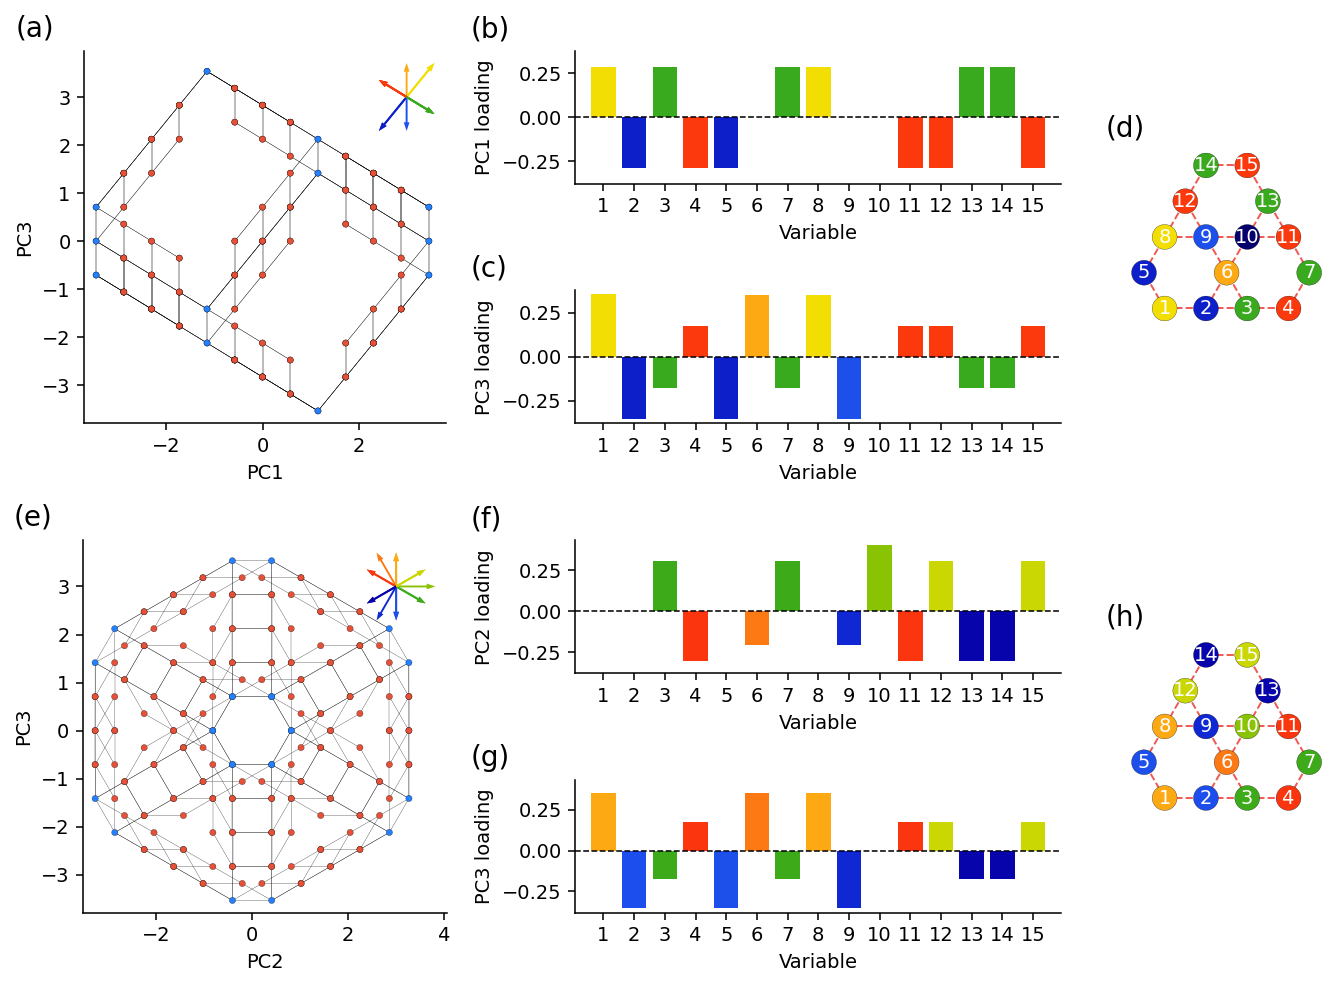

In [25]:
fig = plt.figure(figsize=(7, 7.5/3*2), layout='tight')
gs = fig.add_gridspec(2, 2, width_ratios=[1, 1.25])
gs1 = gs[0, 1].subgridspec(2, 2, hspace=0.8, wspace=0.2, width_ratios=[2.5, 1])
gs2 = gs[1, 1].subgridspec(2, 2, hspace=0.8, wspace=0.2, width_ratios=[2.5, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs1[0, 0])
ax3 = fig.add_subplot(gs1[1, 0], sharex=ax2, sharey=ax2)
ax4 = fig.add_subplot(gs1[:2, 1])
ax5 = fig.add_subplot(gs[1, 0])
ax6 = fig.add_subplot(gs2[0, 0])
ax7 = fig.add_subplot(gs2[1, 0], sharex=ax6, sharey=ax6)
ax8 = fig.add_subplot(gs2[:2, 1], sharex=ax4, sharey=ax4)
axs_top = [ax1, ax2, ax3, ax4]
axs_bottom= [ax5, ax6, ax7, ax8]

xcomponent = 0
ycomponent = 2
fig, axs_top = plot_pca_and_biplot(fig, axs_top, xcomponent, ycomponent,)
xcomponent = 1
ycomponent = 2
fig, axs_bottom = plot_pca_and_biplot(fig, axs_bottom, xcomponent, ycomponent, flip_xbasis=True,
                                     panel_label=["e", "f", "g", "h"])

fig.savefig("../figures/fig-12.svg")
fig.savefig("../figures/fig-12.pdf")

# Fig. 13

In [26]:
def bin2int(array):
    return int(''.join(map(str, array)), 2)

In [27]:
def plot_flux_diagrams(flux_scale, flux_threshold, fig, axs, xcomponent=0, ycomponent=1,
                       flip_xbasis=[True, False, False], flip_ybasis=[True, True, True]):
    T = 0.3
    if xcomponent == 0:
        inset_pos = [3.1, -2.7]
    elif xcomponent == 1:
        inset_pos = [3.4, -2.7]
    else :
        inset_pos = [3.4, -2.7]

    # one-ring
    ax = axs[0, 0]
    im, coord, arrow = ns.Farhan2013(1)
    energy, probability = ns.calc_energy_and_canonical_probability(im, T)
    results = dn.calc_time_evolution(im, T)
    flux_edge_list = results.flux_edge_list
    fig, ax, pca = hc.plot_flux_on_pca(probability, flux_edge_list, flux_scale, flux_threshold,
                                       xcomponent=xcomponent, ycomponent=ycomponent,
                                       flip_xbasis=flip_xbasis[0], flip_ybasis=flip_ybasis[0],
                                       basis_origin=[3, 3],
                                       fig=fig, ax=ax, return_pca=True)
    eigenvector = pca.components_
    basis = np.vstack((eigenvector[xcomponent], eigenvector[ycomponent]))
    basis = basis.T
    if flip_xbasis[0]:
        basis[:, 0] = -basis[:, 0]
    if flip_ybasis[0]:
        basis[:, 1] = -basis[:, 1]
    angles = np.arctan2(basis[:, 1], basis[:, 0])
    norm_angles = (angles + np.pi) / (2 * np.pi)
    inset_width = 1.0
    inset_height = inset_width*1.0
    axin = ax.inset_axes([inset_pos[0]-inset_width/2, inset_pos[1]-inset_height/2, inset_width, inset_height], transform=ax.transData)
    axin = ns.plot_kagome_network(im, 1.2*coord, ax=axin, node_size=4, node_color=norm_angles, cmap=cc.cm.rainbow4, vmin=0, vmax=1, edge_width_scale=0.4)
    ax.text(-0.2, 1.04, "(a1)", fontsize=label_fontsize, transform=ax.transAxes)
    _fig, _ax = plt.subplots()
    state_index = np.arange(len(probability)) + 1
    _ax.pcolormesh(results.time, state_index, results.probability_vectors)

    # two-ring
    ax = axs[0, 1]
    im, coord, arrow = ns.Farhan2013(2)
    energy, probability = ns.calc_energy_and_canonical_probability(im, T)
    #results = dn.calc_time_evolution(im, T)
    #flux_edge_list = results.flux_edge_list
    flux_edge_list = [np.load("../data/flux_edge_list_2_ring.npz")[i] for i in list(np.load("../data/flux_edge_list_2_ring.npz"))]
    fig, ax, pca = hc.plot_flux_on_pca(probability, flux_edge_list, flux_scale, flux_threshold,
                                       xcomponent=xcomponent, ycomponent=ycomponent,
                                       flip_xbasis=flip_xbasis[1], flip_ybasis=flip_ybasis[1],
                                       basis_origin=[3, 3],
                                       fig=fig, ax=ax, return_pca=True)
    eigenvector = pca.components_
    basis = np.vstack((eigenvector[xcomponent], eigenvector[ycomponent]))
    basis = basis.T
    if flip_xbasis[1]:
        basis[:, 0] = -basis[:, 0]
    if flip_ybasis[1]:
        basis[:, 1] = -basis[:, 1]
    angles = np.arctan2(basis[:, 1], basis[:, 0])
    norm_angles = (angles + np.pi) / (2 * np.pi)
    inset_width = 2.0
    inset_height = inset_width*0.6
    axin = ax.inset_axes([inset_pos[0]-inset_width/2, inset_pos[1]-inset_height/2, inset_width, inset_height], transform=ax.transData)
    axin = ns.plot_kagome_network(im, 1.2*coord, ax=axin, node_size=4, node_color=norm_angles, cmap=cc.cm.rainbow4, vmin=0, vmax=1, edge_width_scale=0.4)
    ax.text(-0.2, 1.04, "(a2)", fontsize=label_fontsize, transform=ax.transAxes)
    #_fig, _ax = plt.subplots()
    #state_index = np.arange(len(probability)) + 1
    #_ax.pcolormesh(results.time, state_index, results.probability_vectors)

    # three-ring
    ax = axs[0, 2]
    im, coord, arrow = ns.Farhan2013(3)
    energy, probability = ns.calc_energy_and_canonical_probability(im, T)
    flux_edge_list = [np.load("../data/flux_edge_list_3_ring.npz")[i] for i in list(np.load("../data/flux_edge_list_3_ring.npz"))]
    fig, ax, pca = hc.plot_flux_on_pca(probability, flux_edge_list, flux_scale, flux_threshold,
                                       xcomponent=xcomponent, ycomponent=ycomponent,
                                       flip_xbasis=flip_xbasis[2], flip_ybasis=flip_ybasis[2],
                                       basis_origin=[3, 3],
                                       fig=fig, ax=ax, return_pca=True)
    eigenvector = pca.components_
    basis = np.vstack((eigenvector[xcomponent], eigenvector[ycomponent]))
    basis = basis.T
    if flip_xbasis[1]:
        basis[:, 0] = -basis[:, 0]
    if flip_ybasis[1]:
        basis[:, 1] = -basis[:, 1]
    angles = np.arctan2(basis[:, 1], basis[:, 0])
    norm_angles = (angles + np.pi) / (2 * np.pi)
    inset_width = 2.0
    inset_height = inset_width*1.0
    axin = ax.inset_axes([inset_pos[0]-inset_width/2, inset_pos[1]-inset_height/2, inset_width, inset_height], transform=ax.transData)
    axin = ns.plot_kagome_network(im, 1.2*coord, ax=axin, node_size=4, node_color=norm_angles, cmap=cc.cm.rainbow4, vmin=0, vmax=1, edge_width_scale=0.4)
    ax.text(-0.2, 1.04, "(a3)", fontsize=label_fontsize, transform=ax.transAxes)

    # one-ring with field
    ax = axs[1, 0]
    im, coord, arrow = ns.Farhan2013(1)
    energy, probability = ns.calc_energy_and_canonical_probability(im, T)
    external_field = np.array([+1, -1, -1, +1, +1, -1])
    initial_probability_vector = np.zeros(2**len(im))
    initial_probability_vector[bin2int(((-external_field+1)/2).astype(int))] = 1.0
    results = dn.calc_time_evolution(im, T, external_field, initial_probability_vector=initial_probability_vector, final_time=50)
    flux_edge_list = results.flux_edge_list
    fig, ax, pca = hc.plot_flux_on_pca(probability, flux_edge_list, flux_scale, flux_threshold,
                                       xcomponent=xcomponent, ycomponent=ycomponent,
                                       flip_xbasis=flip_xbasis[0], flip_ybasis=flip_ybasis[0],
                                       basis_origin=[3, 3],
                                       fig=fig, ax=ax, return_pca=True)
    eigenvector = pca.components_
    basis = np.vstack((eigenvector[xcomponent], eigenvector[ycomponent]))
    basis = basis.T
    if flip_xbasis[0]:
        basis[:, 0] = -basis[:, 0]
    if flip_ybasis[0]:
        basis[:, 1] = -basis[:, 1]
    angles = np.arctan2(basis[:, 1], basis[:, 0])
    norm_angles = (angles + np.pi) / (2 * np.pi)
    inset_width = 1.0
    inset_height = inset_width*1.0
    axin = ax.inset_axes([inset_pos[0]-inset_width/2, inset_pos[1]-inset_height/2, inset_width, inset_height], transform=ax.transData)
    axin = ns.plot_kagome_network(im, 1.2*coord, ax=axin, node_size=4, node_color=norm_angles, cmap=cc.cm.rainbow4, vmin=0, vmax=1, edge_width_scale=0.4)
    ax.text(-0.2, 1.04, "(b1)", fontsize=label_fontsize, transform=ax.transAxes)
    _fig, _ax = plt.subplots()
    state_index = np.arange(len(probability)) + 1
    _ax.pcolormesh(results.time, state_index, results.probability_vectors)

    # two-ring with field
    ax = axs[1, 1]
    im, coord, arrow = ns.Farhan2013(2)
    energy, probability = ns.calc_energy_and_canonical_probability(im, T)
    #external_field = np.array([1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1])
    #initial_probability_vector = np.zeros(2**len(im))
    #initial_probability_vector[bin2int(((-external_field + 1)/2).astype(int))] = 1.0
    #results = dn.calc_time_evolution(im, T, external_field, initial_probability_vector=initial_probability_vector, final_time=50)
    #flux_edge_list = results.flux_edge_list
    #np.savez("../data/flux_edge_list_2_ring_field", flux_source=flux_edge_list[0], flux_target=flux_edge_list[1], flux_rate=flux_edge_list[2])
    flux_edge_list = [np.load("../data/flux_edge_list_2_ring_field.npz")[i] for i in list(np.load("../data/flux_edge_list_2_ring_field.npz"))]
    fig, ax, pca = hc.plot_flux_on_pca(probability, flux_edge_list, flux_scale, flux_threshold,
                                       xcomponent=xcomponent, ycomponent=ycomponent,
                                       flip_xbasis=flip_xbasis[1], flip_ybasis=flip_ybasis[1],
                                       basis_origin=[3, 3],
                                       fig=fig, ax=ax, return_pca=True)
    eigenvector = pca.components_
    basis = np.vstack((eigenvector[xcomponent], eigenvector[ycomponent]))
    basis = basis.T
    if flip_xbasis[1]:
        basis[:, 0] = -basis[:, 0]
    if flip_ybasis[1]:
        basis[:, 1] = -basis[:, 1]
    angles = np.arctan2(basis[:, 1], basis[:, 0])
    norm_angles = (angles + np.pi) / (2 * np.pi)
    inset_width = 2.0
    inset_height = inset_width*0.6
    axin = ax.inset_axes([inset_pos[0]-inset_width/2, inset_pos[1]-inset_height/2, inset_width, inset_height], transform=ax.transData)
    axin = ns.plot_kagome_network(im, 1.2*coord, ax=axin, node_size=4, node_color=norm_angles, cmap=cc.cm.rainbow4, vmin=0, vmax=1, edge_width_scale=0.4)
    ax.text(-0.2, 1.04, "(b2)", fontsize=label_fontsize, transform=ax.transAxes)
    #_fig, _ax = plt.subplots()
    #state_index = np.arange(len(probability)) + 1
    #_ax.pcolormesh(results.time, state_index, results.probability_vectors)

    # three-ring
    ax = axs[1, 2]
    im, coord, arrow = ns.Farhan2013(3)
    energy, probability = ns.calc_energy_and_canonical_probability(im, T)
    flux_edge_list = [np.load("../data/flux_edge_list_3_ring_field.npz")[i] for i in list(np.load("../data/flux_edge_list_3_ring_field.npz"))]
    fig, ax, pca = hc.plot_flux_on_pca(probability, flux_edge_list, flux_scale, flux_threshold,
                                       xcomponent=xcomponent, ycomponent=ycomponent,
                                       flip_xbasis=flip_xbasis[2], flip_ybasis=flip_ybasis[2],
                                       basis_origin=[3, 3],
                                       fig=fig, ax=ax, return_pca=True)
    eigenvector = pca.components_
    basis = np.vstack((eigenvector[xcomponent], eigenvector[ycomponent]))
    basis = basis.T
    if flip_xbasis[1]:
        basis[:, 0] = -basis[:, 0]
    if flip_ybasis[1]:
        basis[:, 1] = -basis[:, 1]
    angles = np.arctan2(basis[:, 1], basis[:, 0])
    norm_angles = (angles + np.pi) / (2 * np.pi)
    inset_width = 2.0
    inset_height = inset_width*1.0
    axin = ax.inset_axes([inset_pos[0]-inset_width/2, inset_pos[1]-inset_height/2, inset_width, inset_height], transform=ax.transData)
    axin = ns.plot_kagome_network(im, 1.2*coord, ax=axin, node_size=4, node_color=norm_angles, cmap=cc.cm.rainbow4, vmin=0, vmax=1, edge_width_scale=0.4)
    ax.text(-0.2, 1.04, "(b3)", fontsize=label_fontsize, transform=ax.transAxes)

    return fig, axs, pca

The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.


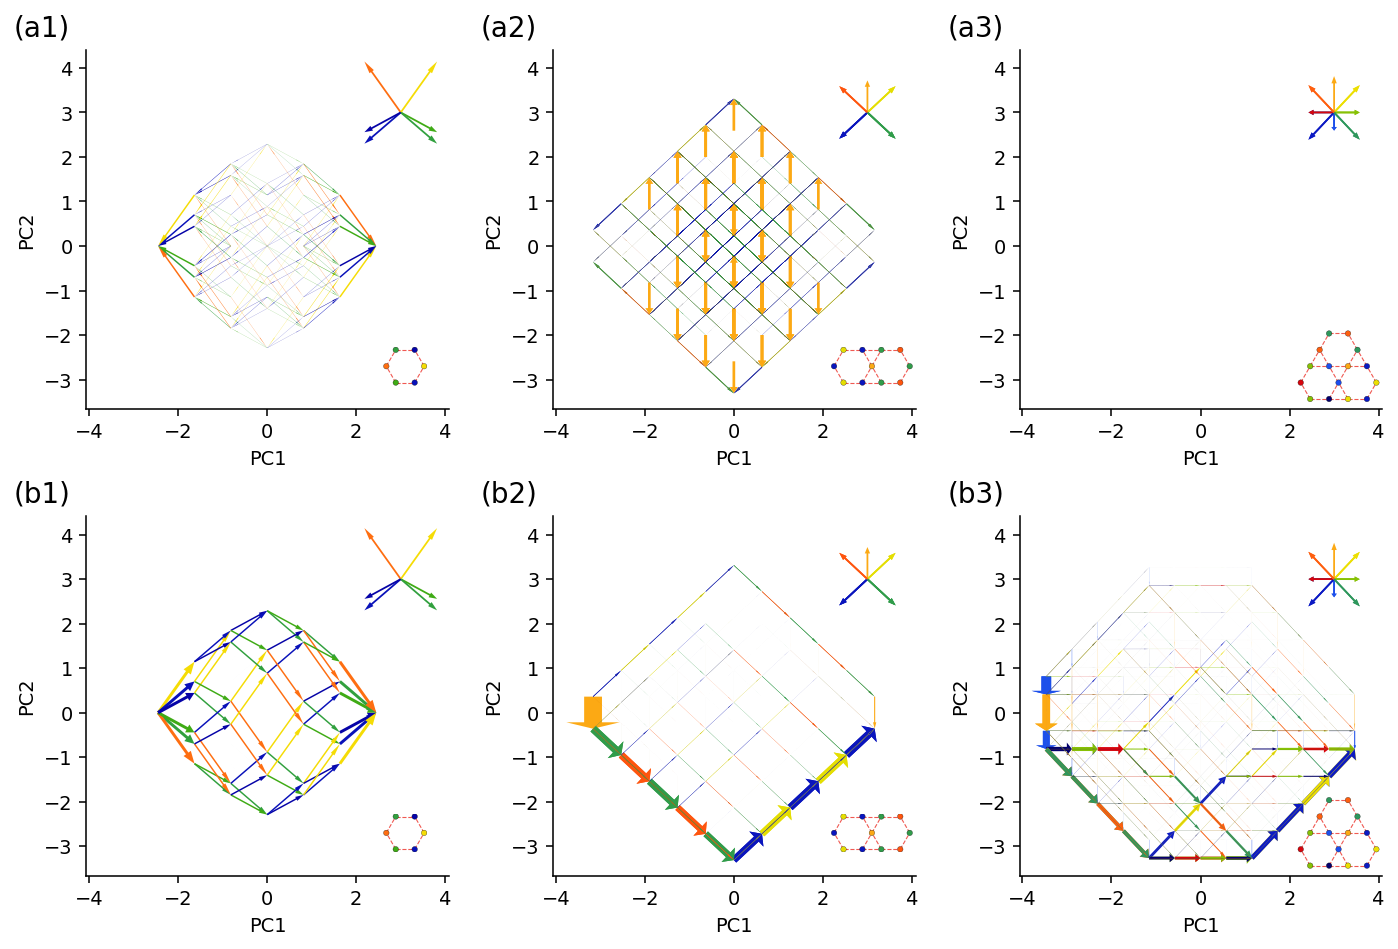

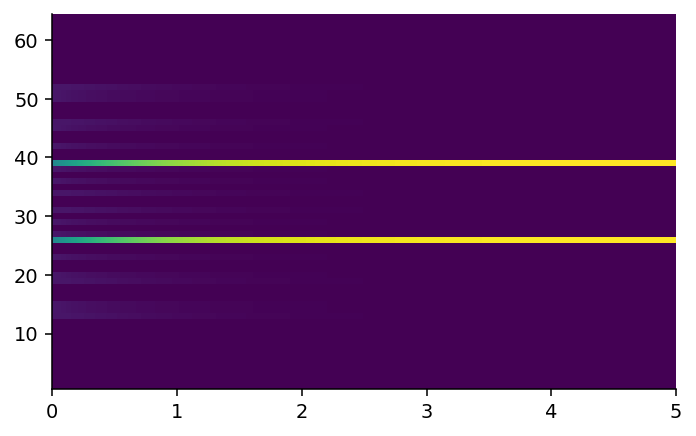

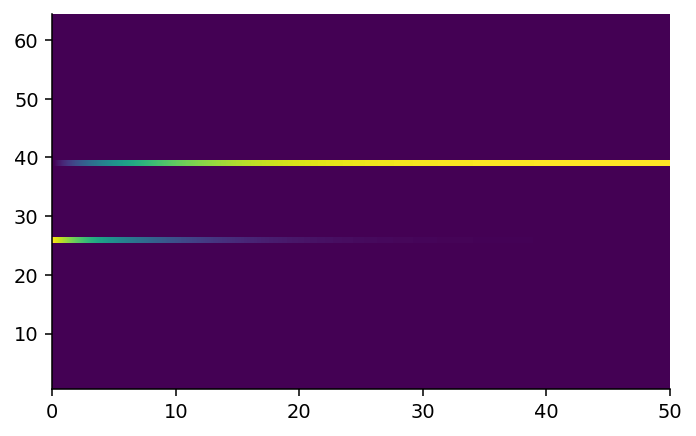

In [28]:
fig, axs = plt.subplots(2, 3, figsize=(7, 7/3*2), sharex=True, sharey=True)
fig, axs, pca = plot_flux_diagrams(10, 2*1e-3, fig, axs)
for i in range(2):
    for j in range(3):
        ax = axs[i, j]
        ax.xaxis.set_tick_params(which='both', labelbottom=True)
        ax.yaxis.set_tick_params(which='both', labelbottom=True)
fig.savefig("../figures/fig-13.svg")
fig.savefig("../figures/fig-13.pdf")

# Fig. 14

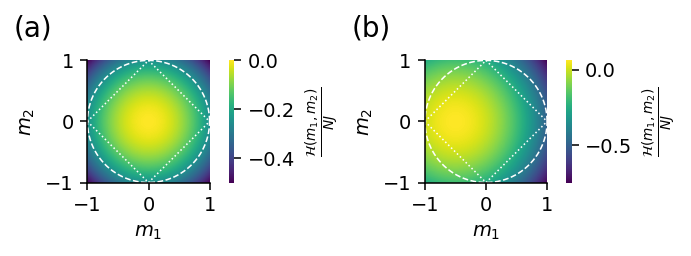

In [29]:
fig, axs = plt.subplots(1, 4, width_ratios=[1, 0.04, 1, 0.04], figsize=(3.375, 1.2))

c_1 = 0.5
c_2 = 1 - c_1
h = 0.25

x = np.linspace(-1, 1, 1001)
y = x.copy()
xx, yy = np.meshgrid(x, y)

zz = - 0.5 * (c_1 * xx**2 + c_2 * yy**2)
ax = axs[0]
cbar = ax.pcolormesh(xx, yy, zz, rasterized=True)
ax.axline((0, 1), slope=-1, c='w', ls=':', lw=0.56)
ax.axline((0, -1), slope=-1, c='w', ls=':', lw=0.56)
ax.axline((1, 0), slope=1, c='w', ls=':', lw=0.56)
ax.axline((-1, 0), slope=1, c='w', ls=':', lw=0.56)
theta = np.linspace(0, 2*np.pi, 1001)
x = np.cos(theta)
y = np.sin(theta)
ax.plot(x, y, c='w', ls='--', lw=0.56)
ax.set_aspect('equal')
ax.set_xlabel(r'$m_1$')
ax.set_ylabel(r'$m_2$')
ax.text(-0.6, 1.2, "(a)", transform=ax.transAxes, fontsize=label_fontsize)

ax = axs[1]
colorbar = fig.colorbar(cbar, ax, label=r'$\frac{\mathcal{H}\left(m_1, m_2\right)}{NJ}$')
colorbar.outline.set_visible(False)

zz = - 0.5 * (c_1 * xx**2 + c_2 * yy**2) - h*xx
ax = axs[2]
cbar = ax.pcolormesh(xx, yy, zz, rasterized=True)
ax.axline((0, 1), slope=-1, c='w', ls=':', lw=0.56)
ax.axline((0, -1), slope=-1, c='w', ls=':', lw=0.56)
ax.axline((1, 0), slope=1, c='w', ls=':', lw=0.56)
ax.axline((-1, 0), slope=1, c='w', ls=':', lw=0.56)
theta = np.linspace(0, 2*np.pi, 1001)
x = np.cos(theta)
y = np.sin(theta)
ax.plot(x, y, c='w', ls='--', lw=0.56)
ax.set_aspect('equal')
ax.set_xlabel(r'$m_1$')
ax.set_ylabel(r'$m_2$')
ax.text(-0.6, 1.2, "(b)", transform=ax.transAxes, fontsize=label_fontsize)

ax = axs[3]
colorbar = fig.colorbar(cbar, ax, label=r'$\frac{\mathcal{H}\left(m_1, m_2\right)}{NJ}$')
colorbar.outline.set_visible(False)

fig.savefig("../figures/fig-14.svg")
fig.savefig("../figures/fig-14.pdf")